In [1]:
import pandas as pd

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)


climate_df = pd.read_parquet("data/climate_data_from_1982.parquet")

yield_df = pd.read_csv("data/barley_yield_from_1982.csv", sep=";")


In [2]:
climate_df.head(10)

scenario nom_dep code_dep                time  year  \
29950  historical     Ain       01 1982-01-01 12:00:00  1982   
29951  historical     Ain       01 1982-01-02 12:00:00  1982   
29952  historical     Ain       01 1982-01-03 12:00:00  1982   
29953  historical     Ain       01 1982-01-04 12:00:00  1982   
29954  historical     Ain       01 1982-01-05 12:00:00  1982   
29955  historical     Ain       01 1982-01-06 12:00:00  1982   
29956  historical     Ain       01 1982-01-07 12:00:00  1982   
29957  historical     Ain       01 1982-01-08 12:00:00  1982   
29958  historical     Ain       01 1982-01-09 12:00:00  1982   
29959  historical     Ain       01 1982-01-10 12:00:00  1982   

                             metric       value  
29950  near_surface_air_temperature  276.292267  
29951  near_surface_air_temperature  275.092407  
29952  near_surface_air_temperature  276.418518  
29953  near_surface_air_temperature  278.893372  
29954  near_surface_air_temperature  278.887207  
29955  near_surface_air_temperature  277.304535  
29956  near_surface_air_temperature  278.184235  
29957  near_surface_air_temperature  278.639221  
29958  near_surface_air_temperature  279.407043  
29959  near_surface_air_temperature  281.282776

In [3]:
climate_wide = climate_df.pivot_table(
    index=["scenario", "nom_dep", "code_dep", "time", "year"],
    columns="metric",
    values="value"
).reset_index()


In [4]:
climate_wide.head()

metric    scenario nom_dep code_dep                time  year  \
0       historical     Ain       01 1982-01-01 12:00:00  1982   
1       historical     Ain       01 1982-01-02 12:00:00  1982   
2       historical     Ain       01 1982-01-03 12:00:00  1982   
3       historical     Ain       01 1982-01-04 12:00:00  1982   
4       historical     Ain       01 1982-01-05 12:00:00  1982   

metric  daily_maximum_near_surface_air_temperature  \
0                                       279.337311   
1                                       277.687225   
2                                       278.388794   
3                                       283.519043   
4                                       281.122253   

metric  near_surface_air_temperature  precipitation  
0                         276.292267       0.000033  
1                         275.092407       0.000139  
2                         276.418518       0.000091  
3                         278.893372       0.000057  
4                         278.887207       0.000257

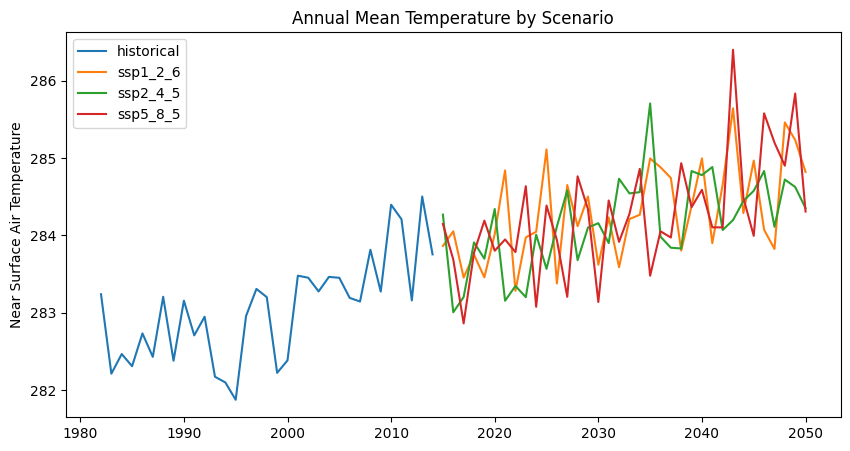

In [5]:
annual = climate_wide.groupby(['scenario','year'])[
    ['near_surface_air_temperature','precipitation']
].mean().reset_index()

import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
for scen in annual['scenario'].unique():
    tmp = annual[annual['scenario']==scen]
    plt.plot(tmp['year'], tmp['near_surface_air_temperature'], label=scen)

plt.title("Annual Mean Temperature by Scenario")
plt.ylabel("Near Surface Air Temperature")
plt.legend()
plt.show()

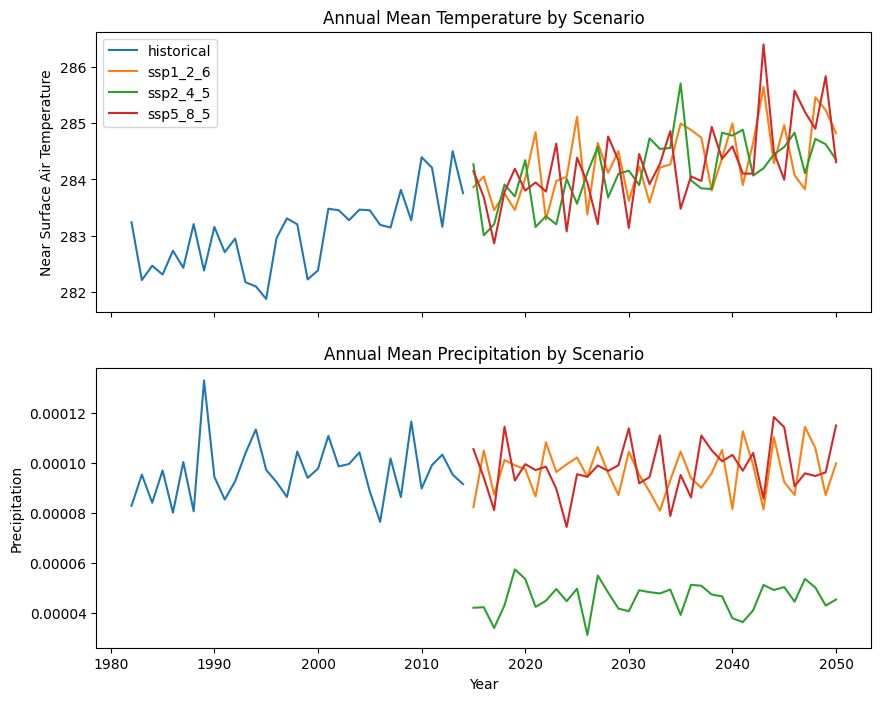

In [6]:
annual = climate_wide.groupby(['scenario', 'year'])[
    ['near_surface_air_temperature', 'precipitation']
].mean().reset_index()

import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

# Temperature plot
for scen in annual['scenario'].unique():
    tmp = annual[annual['scenario'] == scen]
    axes[0].plot(tmp['year'], tmp['near_surface_air_temperature'], label=scen)

axes[0].set_title("Annual Mean Temperature by Scenario")
axes[0].set_ylabel("Near Surface Air Temperature")
axes[0].legend()

# Precipitation plot
for scen in annual['scenario'].unique():
    tmp = annual[annual['scenario'] == scen]
    axes[1].plot(tmp['year'], tmp['precipitation'], label=scen)

axes[1].set_title("Annual Mean Precipitation by Scenario")
axes[1].set_ylabel("Precipitation")
axes[1].set_xlabel("Year")

plt.show()


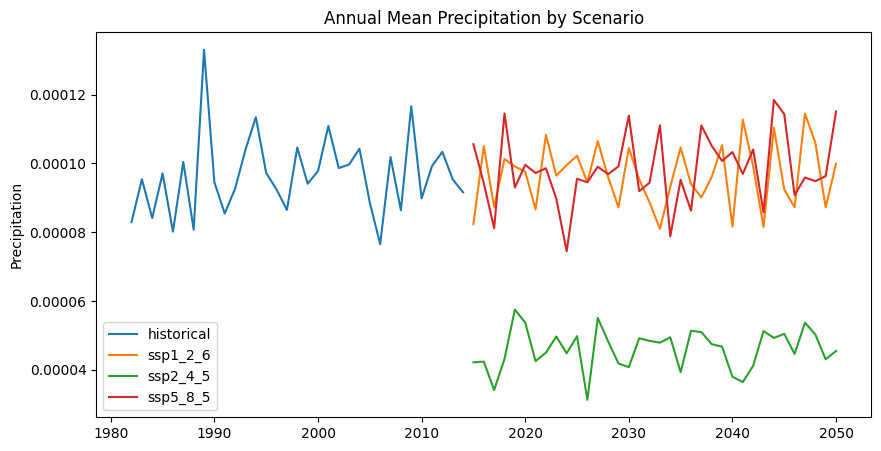

In [7]:
annual = climate_wide.groupby(['scenario','year'])[
    ['near_surface_air_temperature','precipitation']
].mean().reset_index()

import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
for scen in annual['scenario'].unique():
    tmp = annual[annual['scenario']==scen]
    plt.plot(tmp['year'], tmp['precipitation'], label=scen)

plt.title("Annual Mean Precipitation by Scenario")
plt.ylabel("Precipitation")
plt.legend()
plt.show()

In [8]:
yield_df.head()

Unnamed: 0 department  year    yield     area  production
0          82        Ain  1982  3.95008  16065.0     63458.0
1          83        Ain  1983      NaN  14500.0     38400.0
2          84        Ain  1984  4.82258  15500.0     74750.0
3          85        Ain  1985  4.19677  15500.0     65050.0
4          86        Ain  1986  3.59845  12900.0     46420.0

In [9]:
yield_df = yield_df.drop(columns=["Unnamed: 0"], errors="ignore")


In [10]:
yield_df.head()

department  year    yield     area  production
0        Ain  1982  3.95008  16065.0     63458.0
1        Ain  1983      NaN  14500.0     38400.0
2        Ain  1984  4.82258  15500.0     74750.0
3        Ain  1985  4.19677  15500.0     65050.0
4        Ain  1986  3.59845  12900.0     46420.0

In [11]:
yield_df.info()

<class 'pandas.DataFrame'>
RangeIndex: 3583 entries, 0 to 3582
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   department  3583 non-null   str    
 1   year        3583 non-null   int64  
 2   yield       3336 non-null   float64
 3   area        3468 non-null   float64
 4   production  3461 non-null   float64
dtypes: float64(3), int64(1), str(1)
memory usage: 171.9 KB


# Prediction model (no lags, no scaling)


Top Features Selected:
                  feature  importance
150            department   40.385929
20          temp_std_m_m9    2.290156
14          temp_std_m_m3    2.016007
113     temp_std_s_Spring    1.826932
4          temp_mean_m_m5    1.789418
22         temp_std_m_m11    1.688757
9         temp_mean_m_m10    1.593917
23         temp_std_m_m12    1.593691
30          temp_max_m_m7    1.373418
47         temp_min_m_m12    1.311851
33         temp_max_m_m10    1.258891
19          temp_std_m_m8    1.255975
71       precip_sum_m_m12    1.204052
114     temp_std_s_Summer    1.148085
112     temp_std_s_Autumn    1.079918
54    daily_max_temp_m_m7    1.071822
57   daily_max_temp_m_m10    1.068300
117     temp_max_s_Spring    1.044885
32          temp_max_m_m9    1.032485
21         temp_std_m_m10    1.026241
37          temp_min_m_m2    0.987953
12          temp_std_m_m1    0.976828
13          temp_std_m_m2    0.931688
16          temp_std_m_m5    0.871085
17          temp_std_m_m6 

/Users/magdalenaj1000/Documents/BCG_challange/BCG_challange/barley_env/lib/python3.11/site-packages/sklearn/metrics/_regression.py:1288: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/magdalenaj1000/Documents/BCG_challange/BCG_challange/barley_env/lib/python3.11/site-packages/sklearn/metrics/_regression.py:1288: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)



=== CatBoost ===
Overall R²: 0.414, MAE: 0.763, RMSE: 0.977

Per-department stats:
                               R2       MAE      RMSE
Nievre                   0.854102  0.250821  0.311503
Deux_Sevres              0.785745  0.287980  0.346377
Mayenne                  0.692329  0.361958  0.460114
Haute_Marne              0.690035  0.308589  0.429860
Loire_Atlantique         0.678937  0.444358  0.566086
Indre_et_Loire           0.671985  0.400007  0.521322
Jura                     0.667663  0.359202  0.480313
Manche                   0.661459  0.339116  0.440617
Seine_et_Marne           0.648595  0.314089  0.402775
Haute_Loire              0.622698  0.471684  0.626369
Haute_Saone              0.620355  0.384080  0.500926
Orne                     0.614199  0.441861  0.519184
Yvelines                 0.573126  0.348365  0.464546
Loir_et_Cher             0.572708  0.450821  0.585323
Maine_et_Loire           0.569850  0.425447  0.542097
Moselle                  0.557737  0.465266  0.57333

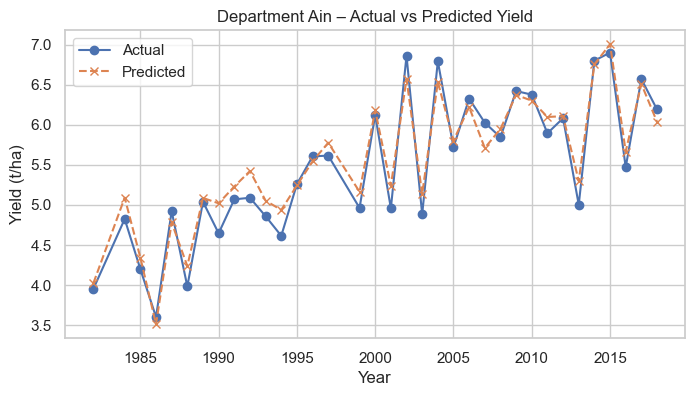

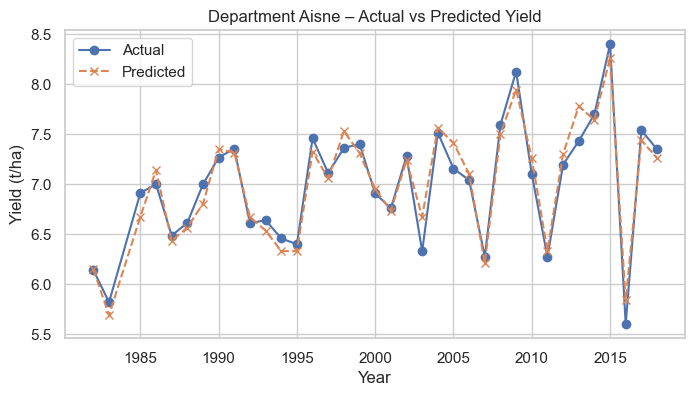

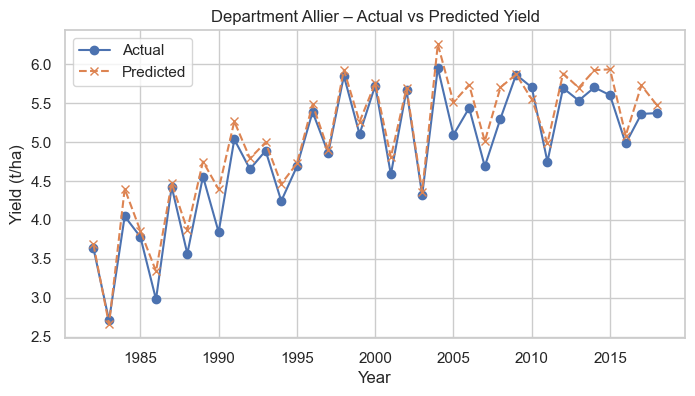

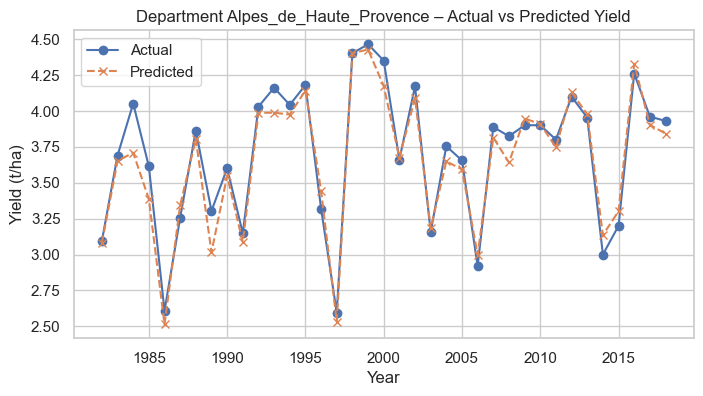

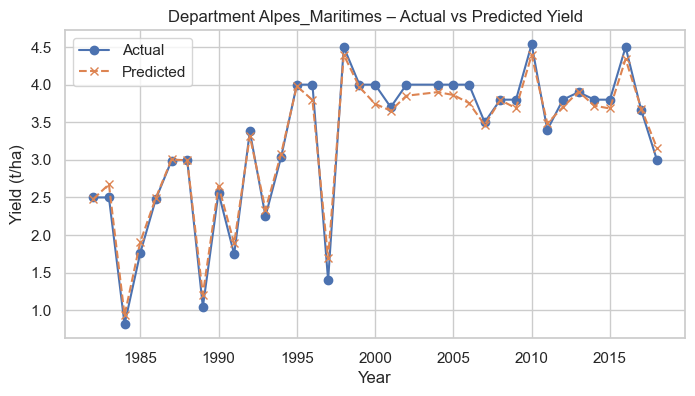

In [12]:
# ==============================
# Barley Yield Prediction Workflow (Full Working Version)
# ==============================

# ------------------------------
# 0️⃣ Imports
# ------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from catboost import CatBoostRegressor
import xgboost as xgb

sns.set(style="whitegrid")

# ------------------------------
# 1️⃣ Prepare Climate Features
# ------------------------------
climate_wide['time'] = pd.to_datetime(climate_wide['time'])
climate_wide['month'] = climate_wide['time'].dt.month
climate_wide['day'] = climate_wide['time'].dt.day
climate_wide['year'] = climate_wide['time'].dt.year

def month_to_season(month):
    if month in [12,1,2]: return 'Winter'
    elif month in [3,4,5]: return 'Spring'
    elif month in [6,7,8]: return 'Summer'
    else: return 'Autumn'

climate_wide['season'] = climate_wide['month'].apply(month_to_season)

# ------------------------------
# 2️⃣ Monthly Aggregates
# ------------------------------
monthly = climate_wide.groupby(['nom_dep','year','month']).agg({
    'near_surface_air_temperature':['mean','std','max','min'],
    'daily_maximum_near_surface_air_temperature':'max',
    'precipitation':['sum','mean','max','min']
}).reset_index()

monthly.columns = ['department','year','month',
                   'temp_mean_m','temp_std_m','temp_max_m','temp_min_m',
                   'daily_max_temp_m','precip_sum_m','precip_mean_m','precip_max_m','precip_min_m']

monthly_wide = monthly.pivot(index=['department','year'], columns='month')
monthly_wide.columns = ['{}_m{}'.format(c[0], c[1]) for c in monthly_wide.columns]
monthly_wide = monthly_wide.reset_index()

# Multiply monthly precipitation features by 1000
for col in monthly_wide.columns:
    if 'precip' in col:
        monthly_wide[col] = monthly_wide[col] * 1000

# ------------------------------
# 3️⃣ Seasonal Aggregates
# ------------------------------
seasonal = climate_wide.groupby(['nom_dep','year','season']).agg({
    'near_surface_air_temperature':['mean','std','max','min'],
    'daily_maximum_near_surface_air_temperature':'max',
    'precipitation':['sum','mean','max','min']
}).reset_index()

seasonal.columns = ['department','year','season',
                    'temp_mean_s','temp_std_s','temp_max_s','temp_min_s',
                    'daily_max_temp_s','precip_sum_s','precip_mean_s','precip_max_s','precip_min_s']

seasonal_wide = seasonal.pivot(index=['department','year'], columns='season')
seasonal_wide.columns = ['{}_{}'.format(c[0], c[1]) for c in seasonal_wide.columns]
seasonal_wide = seasonal_wide.reset_index()

# Multiply seasonal precipitation features by 1000
for col in seasonal_wide.columns:
    if 'precip' in col:
        seasonal_wide[col] = seasonal_wide[col] * 1000

# ------------------------------
# 4️⃣ Merge Climate Features with Yield
# ------------------------------
model_df = yield_df.merge(monthly_wide, on=['department','year'], how='left')
model_df = model_df.merge(seasonal_wide, on=['department','year'], how='left')

# ------------------------------
# 5️⃣ Representative Month for Cyclical Features
# ------------------------------
rep_month = climate_wide.groupby(['nom_dep','year'])['month'].mean().reset_index()
rep_month.rename(columns={'nom_dep':'department','month':'month_rep'}, inplace=True)
model_df = model_df.merge(rep_month, on=['department','year'], how='left')

# ------------------------------
# 6️⃣ Additional Climate Features
# ------------------------------
gdd_total = climate_wide.groupby(['nom_dep','year'])['near_surface_air_temperature'].apply(lambda x: np.maximum(x-5, 0).sum()).reset_index(name='gdd_total')
heat_days = climate_wide.groupby(['nom_dep','year'])['near_surface_air_temperature'].apply(lambda x: (x>288).sum()).reset_index(name='heat_days')
dry_days = climate_wide.groupby(['nom_dep','year'])['precipitation'].apply(lambda x: (x<0.0000001).sum()).reset_index(name='dry_days')

spring = climate_wide[climate_wide['month'].isin([3,4,5])]
spring_temp = spring.groupby(['nom_dep','year'])['near_surface_air_temperature'].mean().reset_index(name='spring_temp')
spring_precip = spring.groupby(['nom_dep','year'])['precipitation'].sum().reset_index(name='spring_precip')

temp_variability = climate_wide.groupby(['nom_dep','year'])['near_surface_air_temperature'].std().reset_index(name='temp_variability')

# Merge these features into model_df
for df in [gdd_total, heat_days, dry_days, spring_temp, spring_precip, temp_variability]:
    model_df = model_df.merge(df, left_on=['department','year'], right_on=['nom_dep','year'], how='left')
    model_df.drop(columns=['nom_dep'], inplace=True)


# ------------------------------
# 7️⃣ Optional Interaction Features
# ------------------------------
if 'temp_mean_m1' in model_df.columns and 'precip_sum_m1' in model_df.columns:
    model_df['temp_precip_ratio'] = model_df['temp_mean_m1'] / (model_df['precip_sum_m1']+0.01)

# Drop NaNs from lags
model_df = model_df.dropna().reset_index(drop=True)

# ------------------------------
# 8️⃣ Features & Target
# ------------------------------
feature_cols = [col for col in model_df.columns if ('_m' in col or '_s' in col)]  # monthly & seasonal features

# Add your additional climate features
feature_cols += [
    'gdd_total',
    'heat_days',
    'dry_days',
    'spring_temp',
    'spring_precip',
    'temp_variability'
]

if 'temp_precip_ratio' in model_df.columns:
    feature_cols.append('temp_precip_ratio')

X = model_df[feature_cols + ['department']].copy()
y = model_df['yield']

# Ensure department is categorical
X['department'] = X['department'].astype('category')

# ------------------------------
# 9️⃣ Feature Selection via CatBoost
# ------------------------------
cat_selector = CatBoostRegressor(iterations=200, learning_rate=0.05, depth=6, verbose=0)
cat_selector.fit(X, y, cat_features=['department'])
importances = cat_selector.get_feature_importance()
importance_df = pd.DataFrame({'feature': X.columns, 'importance': importances}).sort_values('importance', ascending=False)
top_features = importance_df['feature'].head(40).tolist()
print("\nTop Features Selected:")
print(importance_df.head(40))

# Always keep 'department'
if 'department' not in top_features:
    top_features.append('department')

X_top = X[top_features].copy()

# ------------------------------
# 🔟 TimeSeriesSplit CV & Models
# ------------------------------
tscv = TimeSeriesSplit(n_splits=3)
models = {
    'CatBoost': CatBoostRegressor(
        learning_rate=0.09805490082265875,
        depth=7,
        l2_leaf_reg=6.374616161483045,
        random_strength=7.5556172353119955,
        bagging_temperature=0.10885990276246865,
        verbose=0
    ),
    'XGBoost': xgb.XGBRegressor(
        n_estimators=200,
        learning_rate=0.05,
        max_depth=6,
        random_state=42
    )
}


results = {}
for name, model in models.items():
    r2_list, mae_list, rmse_list = [], [], []
    dept_stats = {}
    
    for train_idx, test_idx in tscv.split(X_top):
        X_train, X_test = X_top.iloc[train_idx].copy(), X_top.iloc[test_idx].copy()
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
        
        if name == 'CatBoost':
            model.fit(X_train, y_train, cat_features=['department'], verbose=0)
        else:
            for df in [X_train, X_test]:
                df['department'] = df['department'].cat.codes
            model.fit(X_train, y_train)
        
        y_pred = model.predict(X_test)
        r2_list.append(r2_score(y_test, y_pred))
        mae_list.append(mean_absolute_error(y_test, y_pred))
        rmse_list.append(np.sqrt(mean_squared_error(y_test, y_pred)))
        
        # Department-level stats
        test_copy = X_test.copy()
        test_copy['y_true'] = y_test
        test_copy['y_pred'] = y_pred
        for dept, group in test_copy.groupby('department'):
            r2_d = r2_score(group['y_true'], group['y_pred'])
            mae_d = mean_absolute_error(group['y_true'], group['y_pred'])
            rmse_d = np.sqrt(mean_squared_error(group['y_true'], group['y_pred']))
            if dept not in dept_stats:
                dept_stats[dept] = {'R2':[], 'MAE':[], 'RMSE':[]}
            dept_stats[dept]['R2'].append(r2_d)
            dept_stats[dept]['MAE'].append(mae_d)
            dept_stats[dept]['RMSE'].append(rmse_d)
    
    results[name] = {
        'R2': np.mean(r2_list),
        'MAE': np.mean(mae_list),
        'RMSE': np.mean(rmse_list),
        'department_stats': {k:{metric: np.mean(vals) for metric,vals in v.items()} for k,v in dept_stats.items()}
    }

# ------------------------------
# 1️⃣1️⃣ Display Stats
# ------------------------------
for model_name, stats in results.items():
    print(f"\n=== {model_name} ===")
    print(f"Overall R²: {stats['R2']:.3f}, MAE: {stats['MAE']:.3f}, RMSE: {stats['RMSE']:.3f}")
    dept_df = pd.DataFrame(stats['department_stats']).T.sort_values('R2', ascending=False)
    print("\nPer-department stats:")
    print(dept_df)

# ------------------------------
# 1️⃣2️⃣ Fit Best Model on Full Data
# ------------------------------
best_model_name = max(results, key=lambda k: results[k]['R2'])
print(f"\nBest model selected: {best_model_name}")

if best_model_name == 'CatBoost':
    final_model = CatBoostRegressor(
        learning_rate=0.09805490082265875,
        depth=7,
        l2_leaf_reg=6.374616161483045,
        random_strength=7.5556172353119955,
        bagging_temperature=0.10885990276246865
    )
    final_model.fit(X_top, y, cat_features=['department'], verbose=0)
    X_final = X_top
else:
    X_final = X_top.copy()
    X_final['department'] = X_final['department'].cat.codes
    final_model = xgb.XGBRegressor(n_estimators=500, learning_rate=0.05, max_depth=6, random_state=42)
    final_model.fit(X_final, y)

model_df['yield_pred'] = final_model.predict(X_final)

# ------------------------------
# 1️⃣3️⃣ Plot Actual vs Predicted
# ------------------------------
for dept in model_df['department'].unique()[:5]:  # plot for first 5 departments
    dept_data = model_df[model_df['department']==dept]
    plt.figure(figsize=(8,4))
    plt.plot(dept_data['year'], dept_data['yield'], marker='o', label='Actual')
    plt.plot(dept_data['year'], dept_data['yield_pred'], marker='x', linestyle='--', label='Predicted')
    plt.title(f"Department {dept} – Actual vs Predicted Yield")
    plt.xlabel("Year")
    plt.ylabel("Yield (t/ha)")
    plt.legend()
    plt.show()


In [13]:
import optuna
from sklearn.model_selection import TimeSeriesSplit

def objective(trial):
    # Suggest hyperparameters
    params = {
        "iterations": 1000, # Start with 500 for faster tuning, then use 1000 for final
        "learning_rate": trial.suggest_float("learning_rate", 0.005, 0.1, log=True),
        "depth": trial.suggest_int("depth", 4, 10),
        "l2_leaf_reg": trial.suggest_float("l2_leaf_reg", 1, 15),
        "random_strength": trial.suggest_float("random_strength", 1, 10),
        "bagging_temperature": trial.suggest_float("bagging_temperature", 0, 1),
        "verbose": False
    }

    tscv = TimeSeriesSplit(n_splits=3)
    scores = []

    # IMPORTANT: Use X_top here (the features from your selection step)
    for train_idx, test_idx in tscv.split(X_top):
        X_tr, X_te = X_top.iloc[train_idx].copy(), X_top.iloc[test_idx].copy()
        y_tr, y_te = y.iloc[train_idx], y.iloc[test_idx]

        model = CatBoostRegressor(**params)

        # Verify 'department' exists in X_top
        model.fit(X_tr, y_tr, cat_features=['department'])

        preds = model.predict(X_te)
        scores.append(r2_score(y_te, preds))

    return np.mean(scores)

# Run the study
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=15)

print(f"🚀 Best Score: {study.best_value:.4f}")
print(f"✅ Best Params: {study.best_params}")

[I 2026-02-18 18:31:58,945] A new study created in memory with name: no-name-358693b1-f814-4e7a-8aa6-ec49f3e1c009
[I 2026-02-18 18:32:01,261] Trial 0 finished with value: 0.24852594783290616 and parameters: {'learning_rate': 0.06904978299016147, 'depth': 4, 'l2_leaf_reg': 9.247213245675255, 'random_strength': 1.3836582437673162, 'bagging_temperature': 0.7477133404877345}. Best is trial 0 with value: 0.24852594783290616.
[I 2026-02-18 18:32:06,223] Trial 1 finished with value: 0.38396922393340144 and parameters: {'learning_rate': 0.02258241921230785, 'depth': 6, 'l2_leaf_reg': 1.3534678134246427, 'random_strength': 9.292408960226595, 'bagging_temperature': 0.7620718475272582}. Best is trial 1 with value: 0.38396922393340144.
[I 2026-02-18 18:32:47,826] Trial 2 finished with value: 0.3166549214570649 and parameters: {'learning_rate': 0.01776483314408284, 'depth': 10, 'l2_leaf_reg': 14.864217005225507, 'random_strength': 5.53778213822668, 'bagging_temperature': 0.24539579270395362}. Best 

🚀 Best Score: 0.4187
✅ Best Params: {'learning_rate': 0.0477465878864552, 'depth': 8, 'l2_leaf_reg': 4.217100730020172, 'random_strength': 7.407874515328051, 'bagging_temperature': 0.16702092644441824}


# Shap

Explaining model: CatBoost


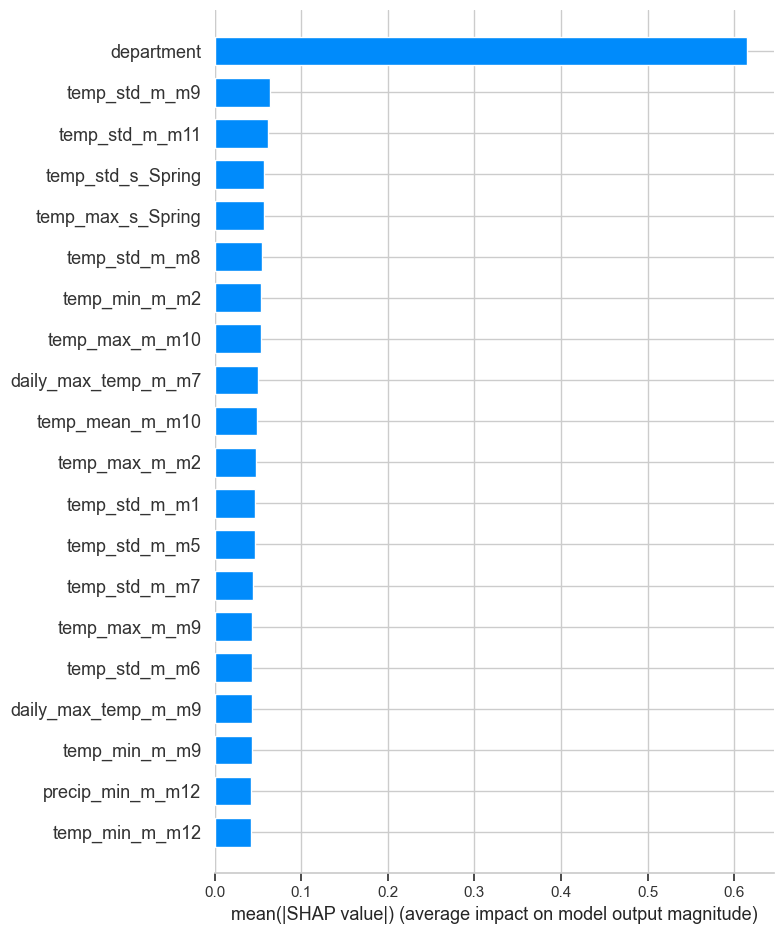

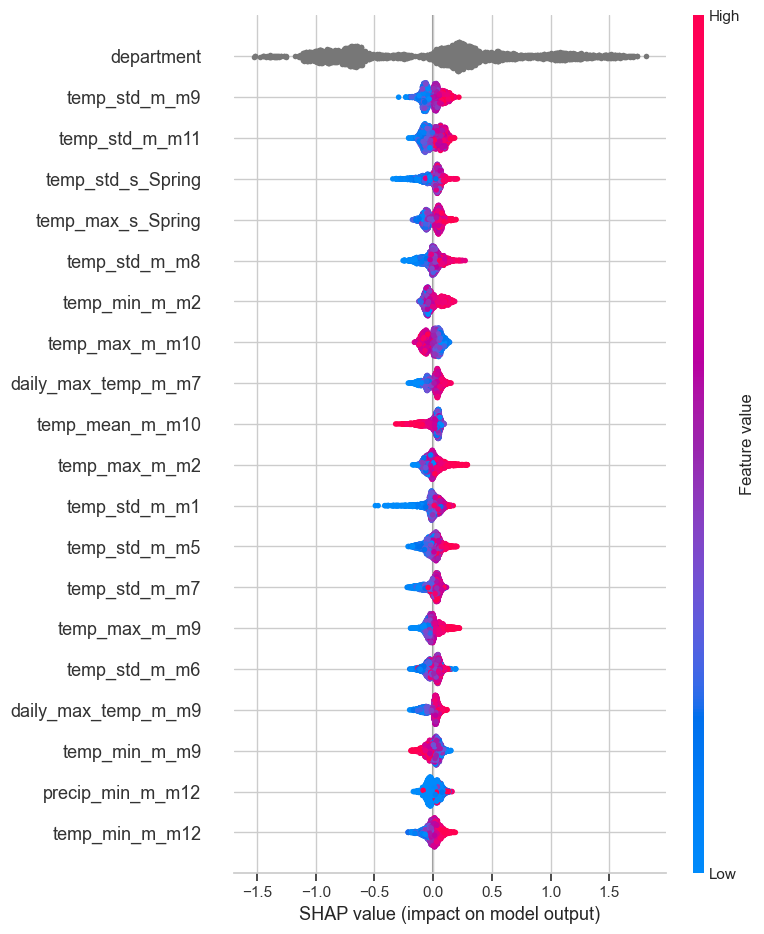

In [25]:
import shap

print(f"Explaining model: {best_model_name}")

# Use same feature matrix used for final training
X_explain = X_top.copy()

if best_model_name == 'XGBoost':
    X_explain['department'] = X_explain['department'].cat.codes
    explainer = shap.TreeExplainer(final_model)
    shap_values = explainer.shap_values(X_explain)

elif best_model_name == 'CatBoost':
    explainer = shap.TreeExplainer(final_model)
    shap_values = explainer.shap_values(X_explain)

# Plot SHAP summary
shap.summary_plot(shap_values, X_explain, plot_type="bar")
shap.summary_plot(shap_values, X_explain)


# Correlation Matrix for selected features

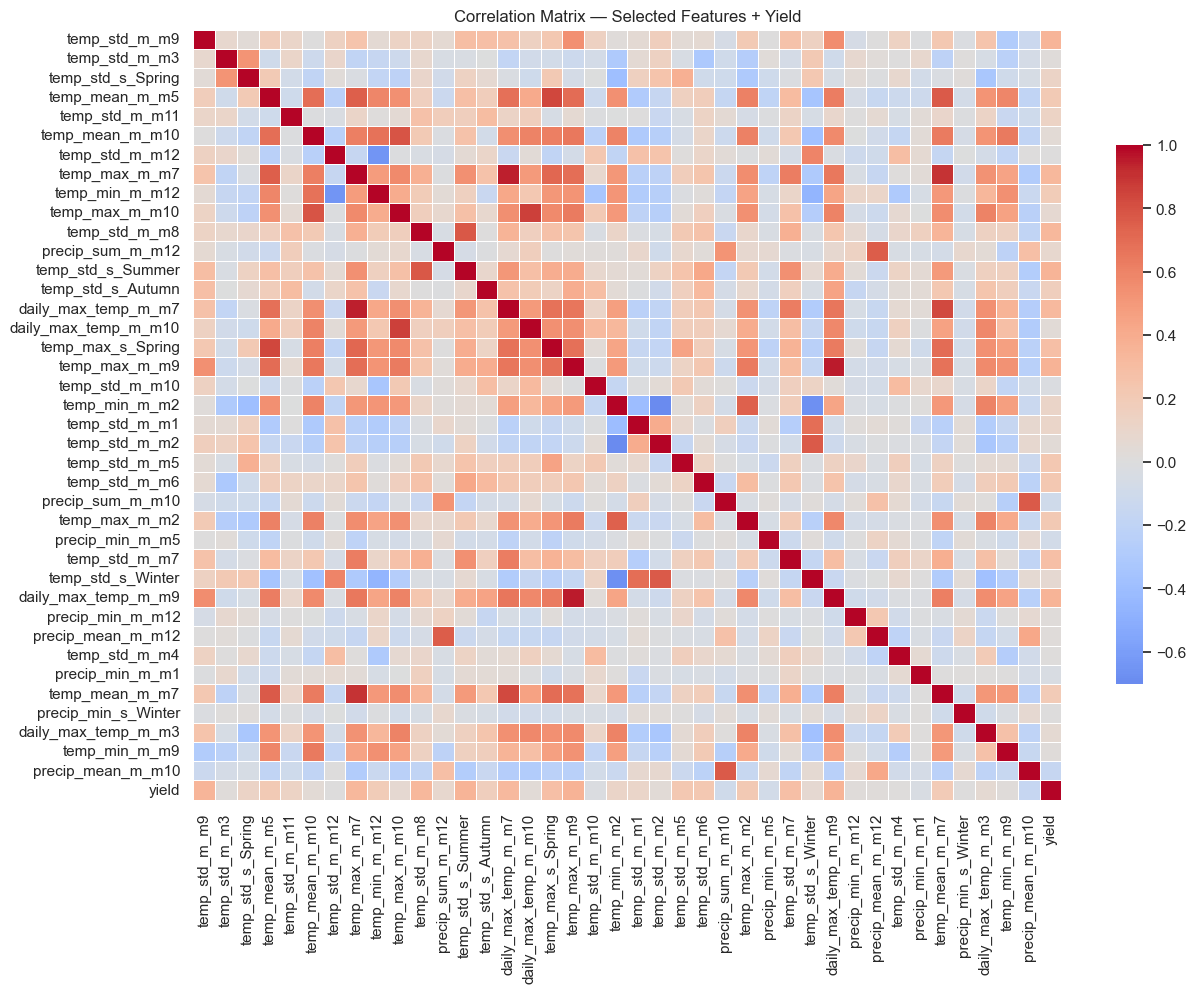

In [26]:
# ------------------------------
# Correlation Matrix (Features + Yield)
# ------------------------------

corr_df = X_top.drop(columns=['department'], errors='ignore').copy()
corr_df['yield'] = model_df['yield']

corr_matrix = corr_df.corr()

plt.figure(figsize=(14,10))
sns.heatmap(
    corr_matrix,
    cmap="coolwarm",
    center=0,
    linewidths=0.5,
    cbar_kws={"shrink": 0.7}
)
plt.title("Correlation Matrix — Selected Features + Yield")
plt.show()




# Future Scenario Predictions

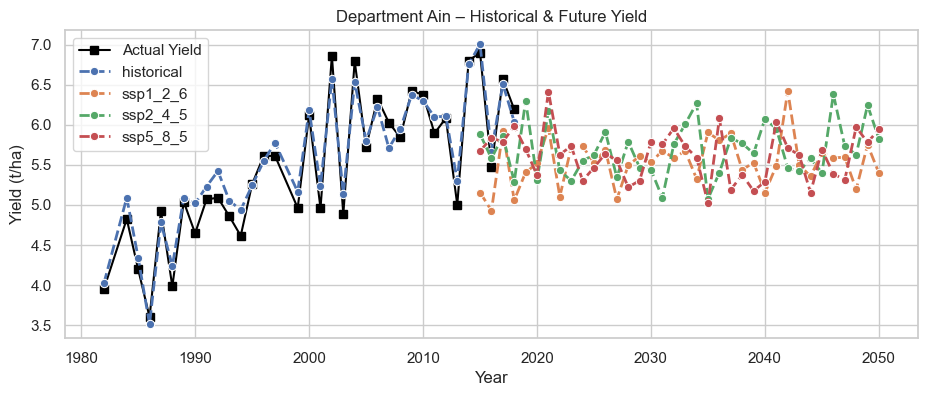

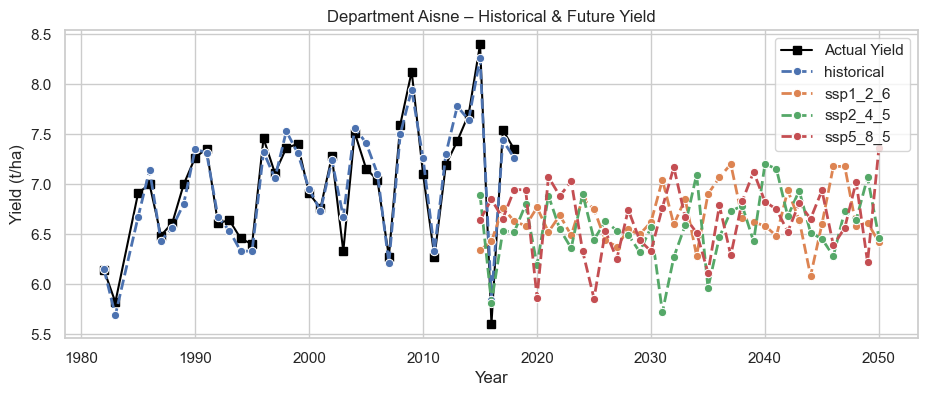

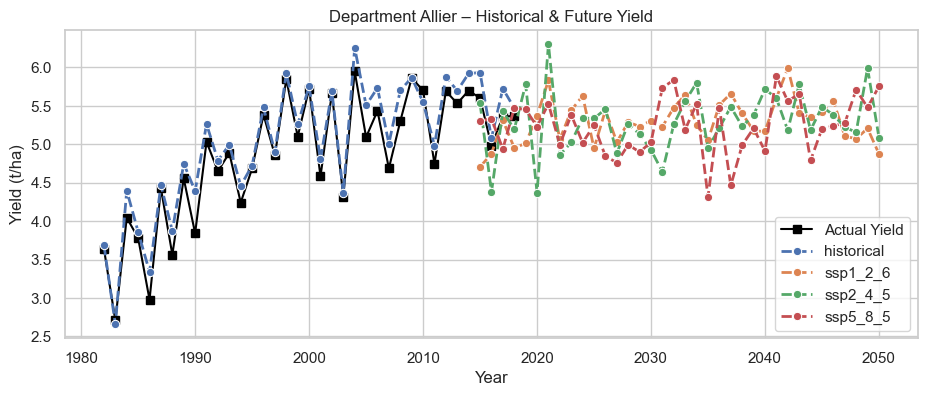

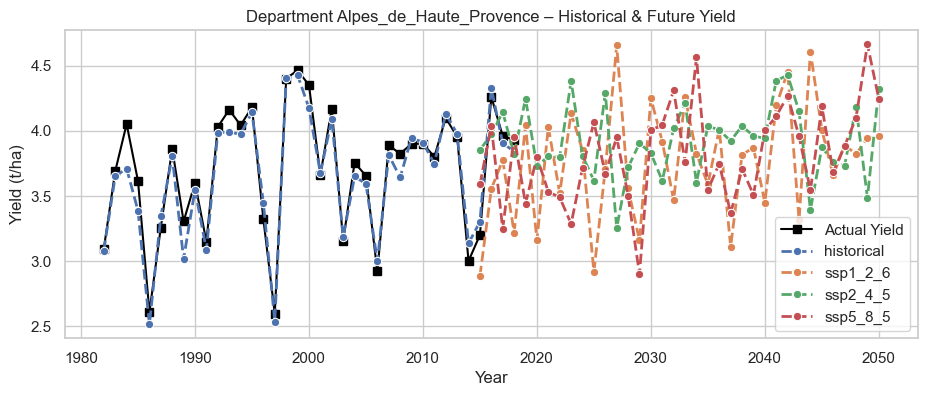

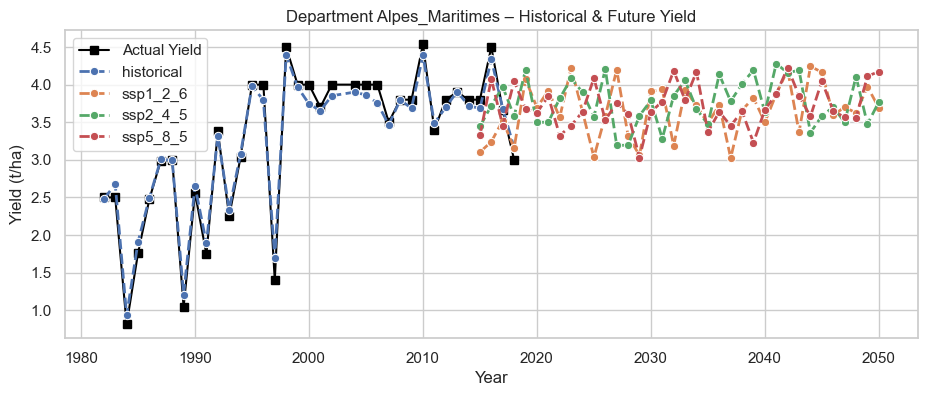

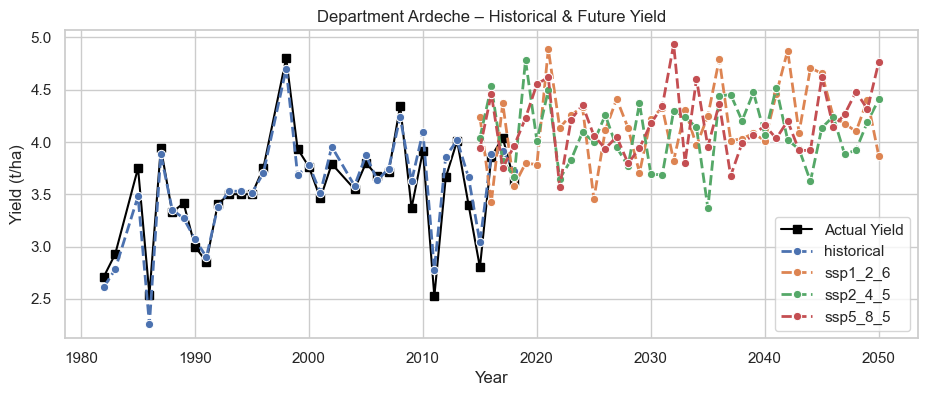

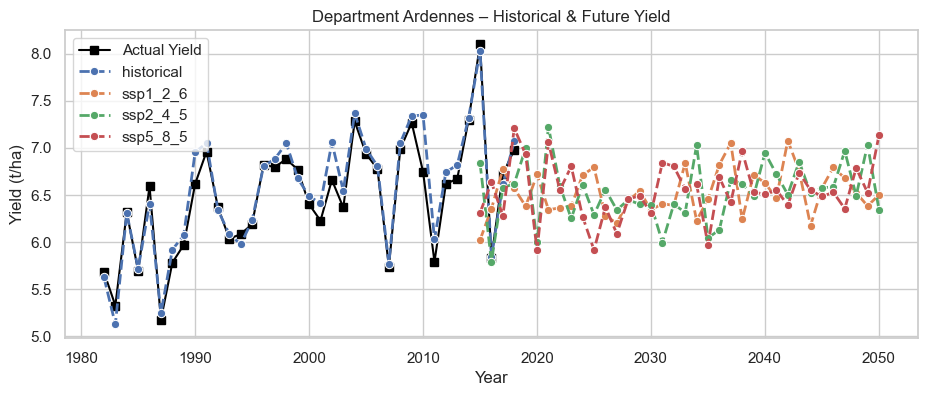

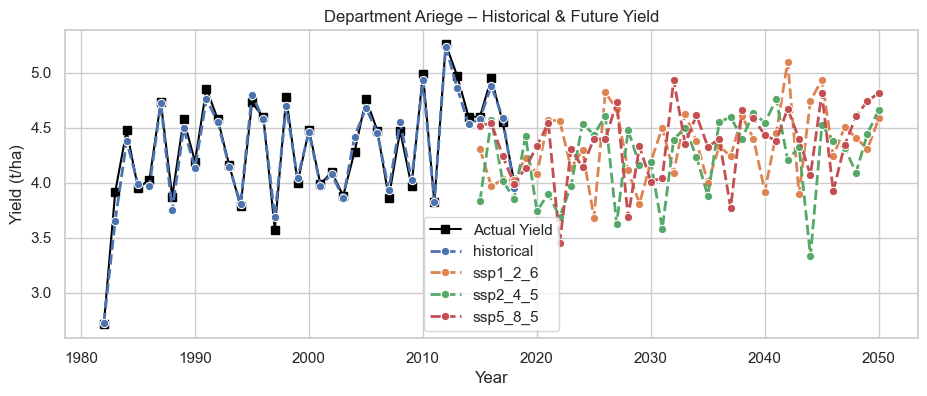

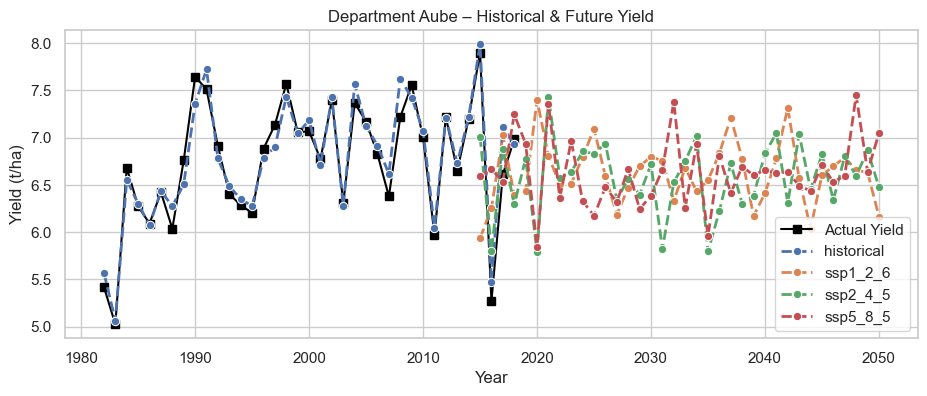

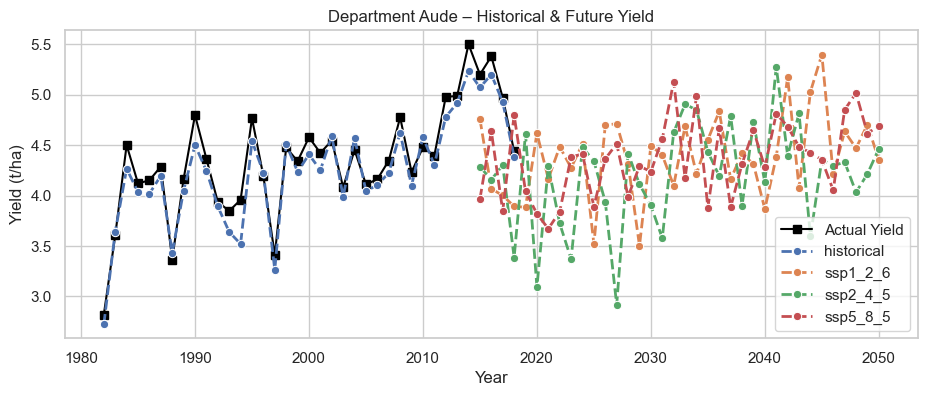

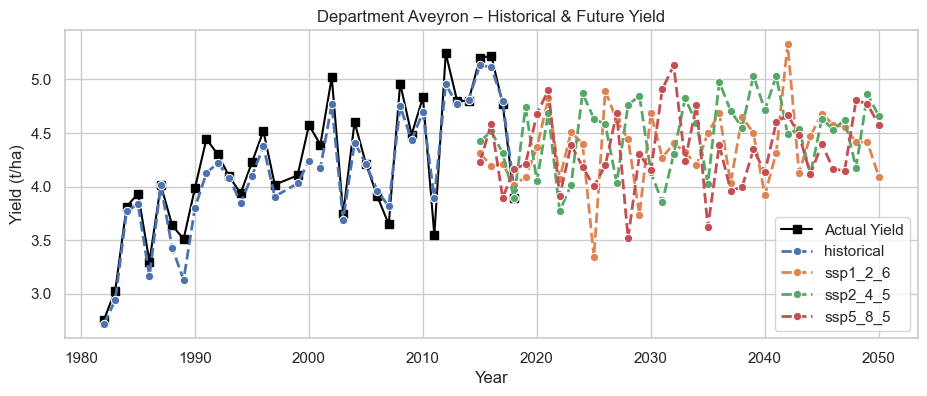

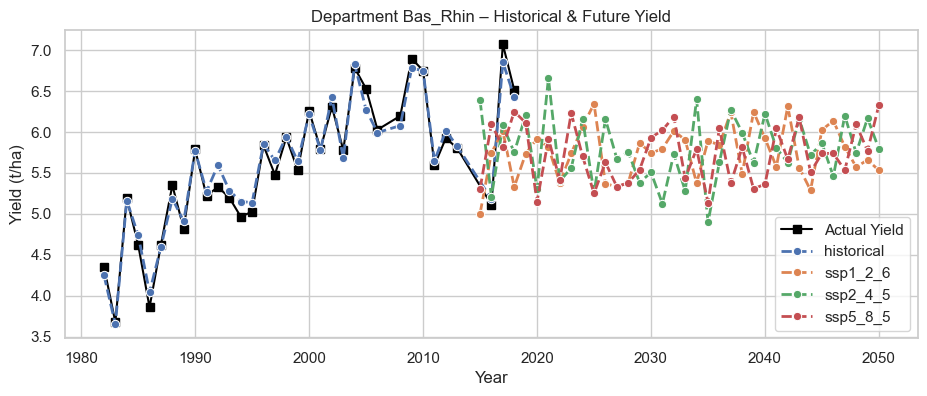

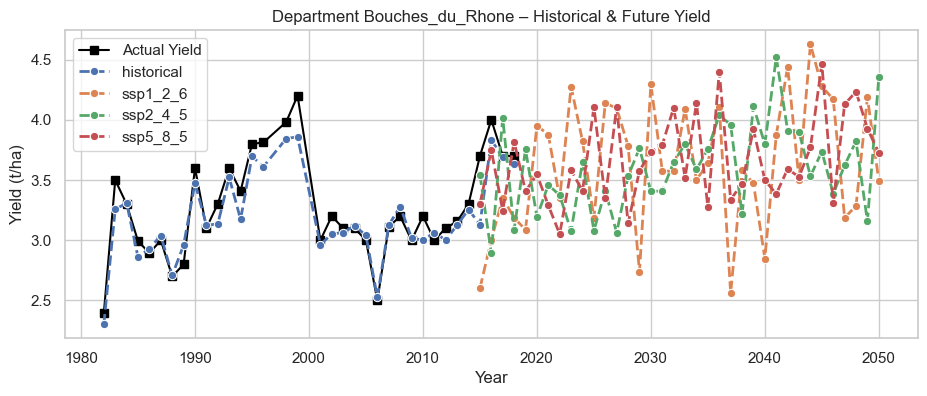

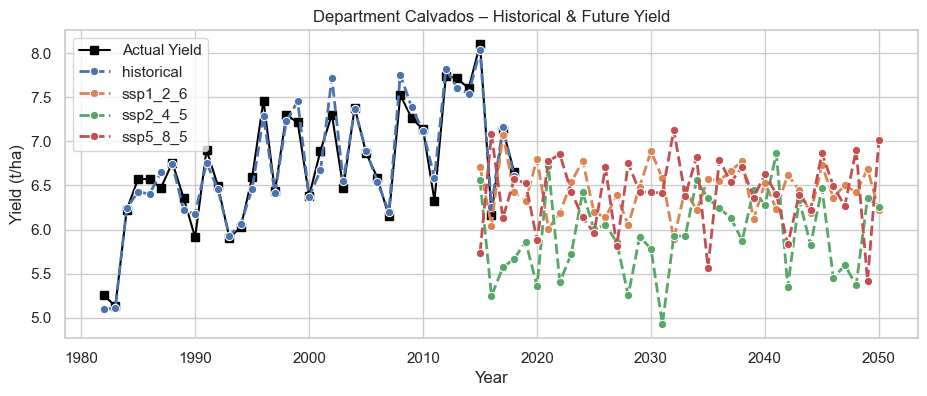

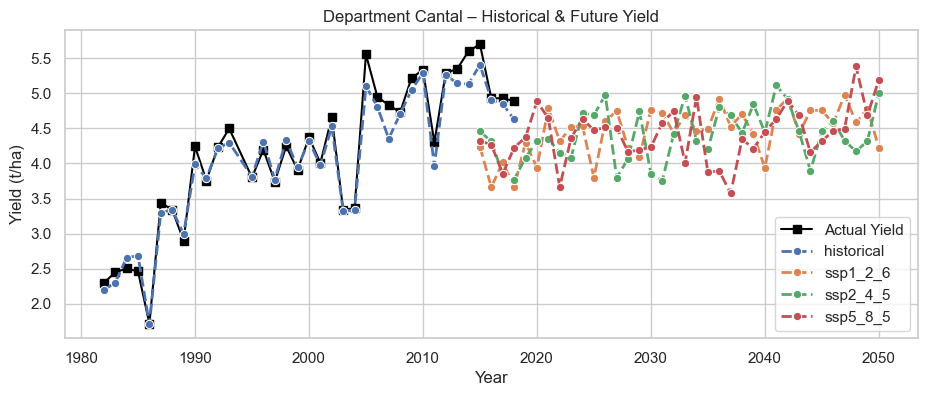

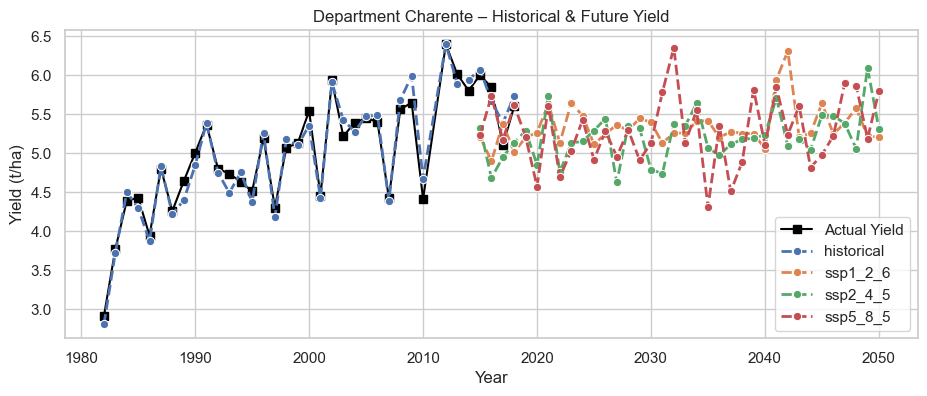

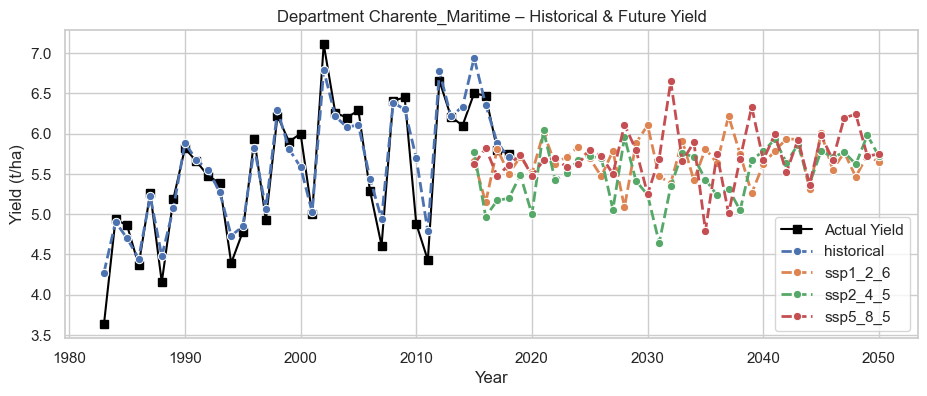

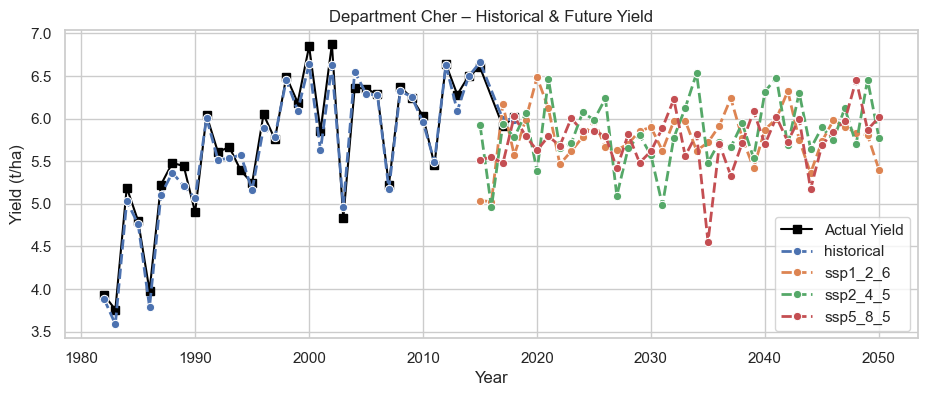

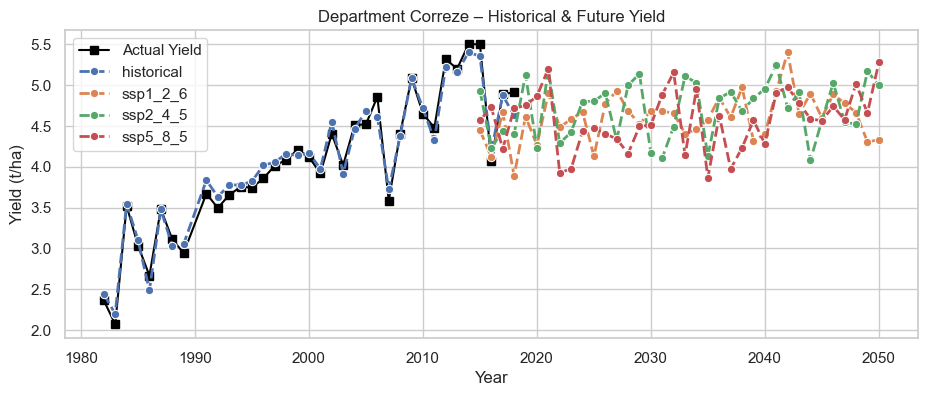

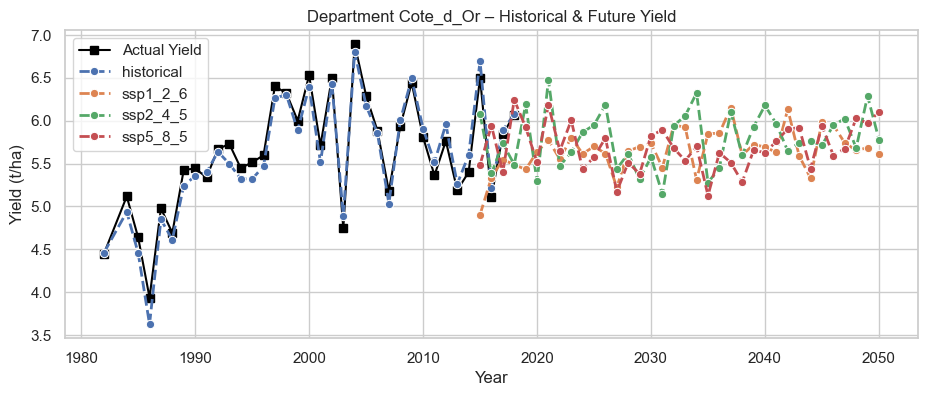

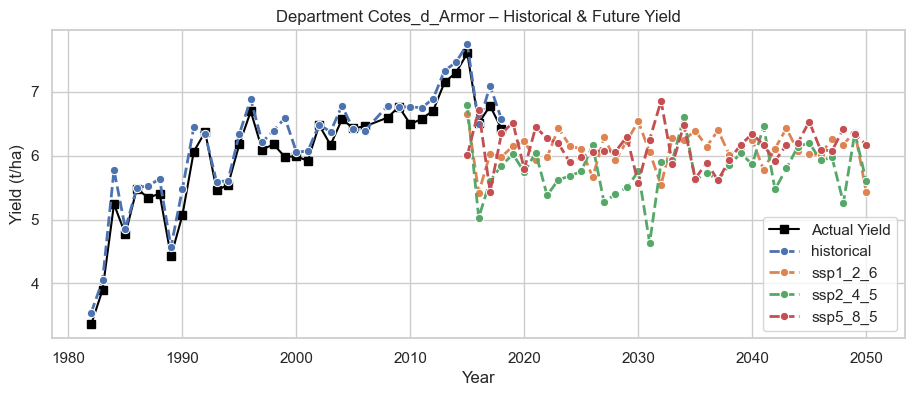

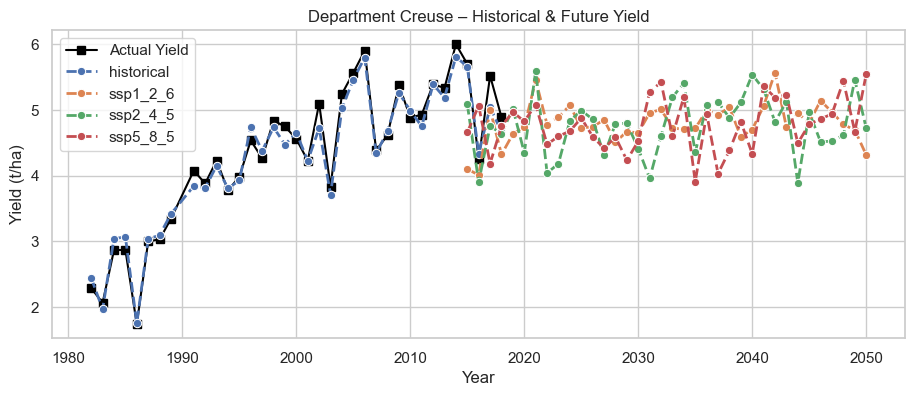

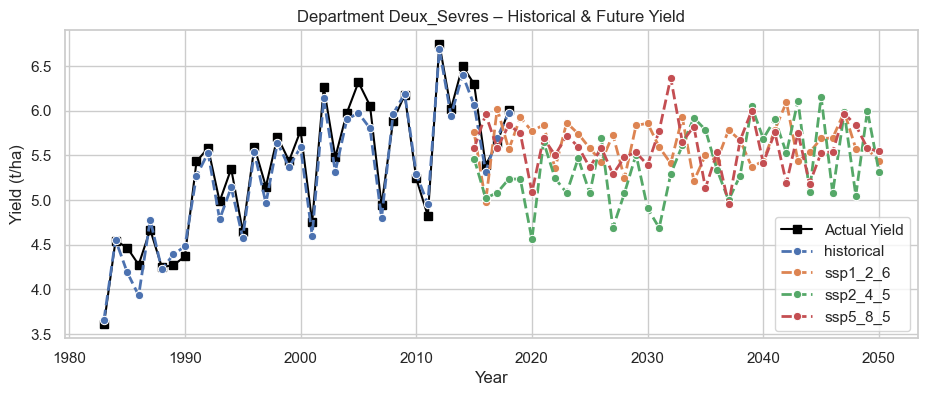

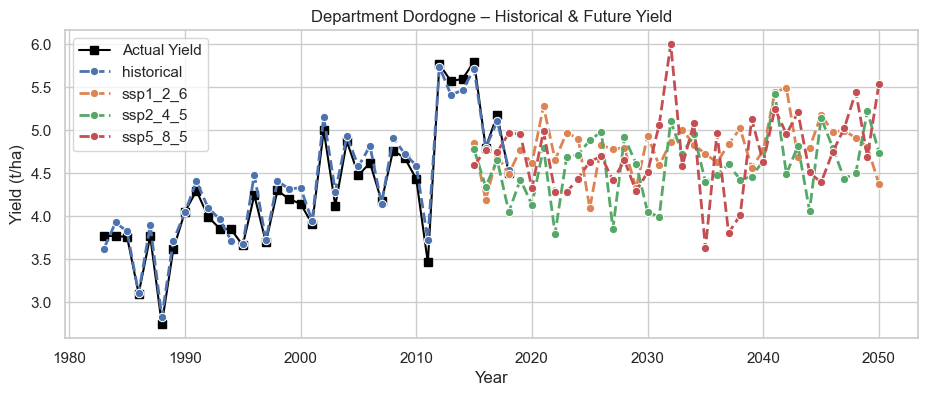

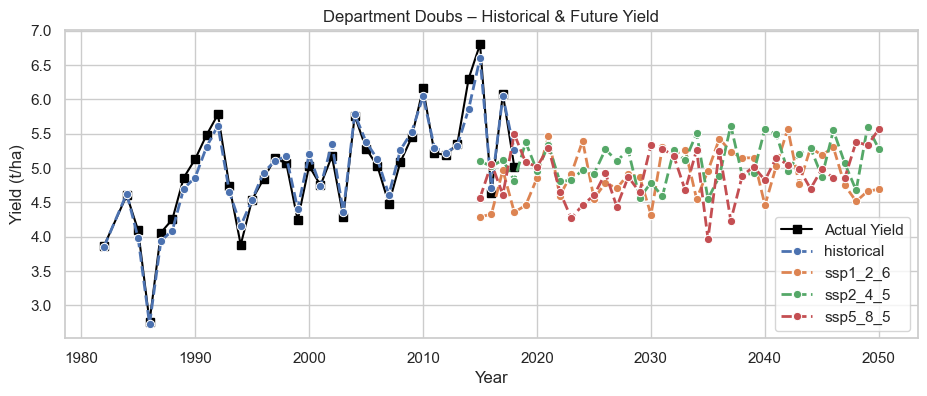

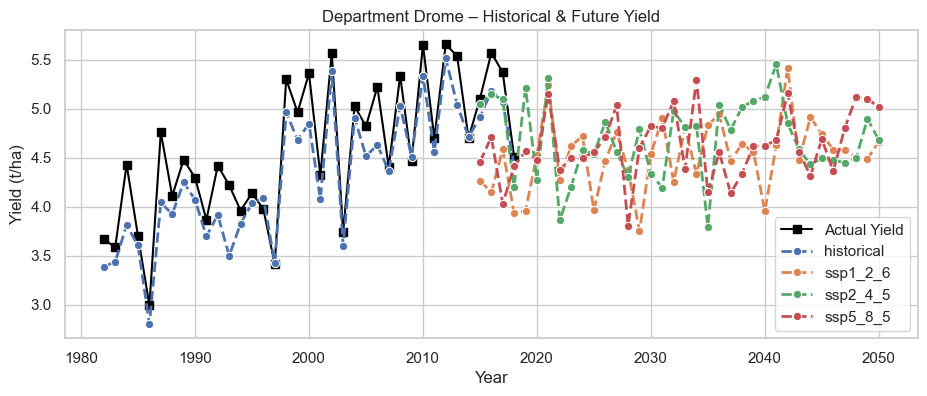

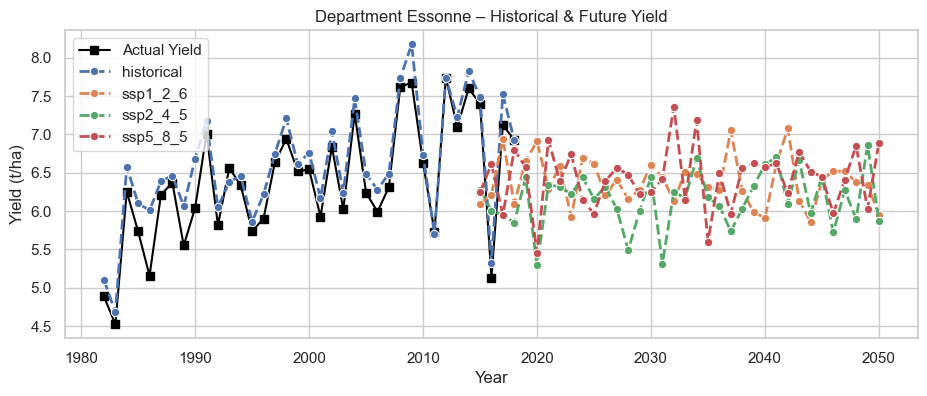

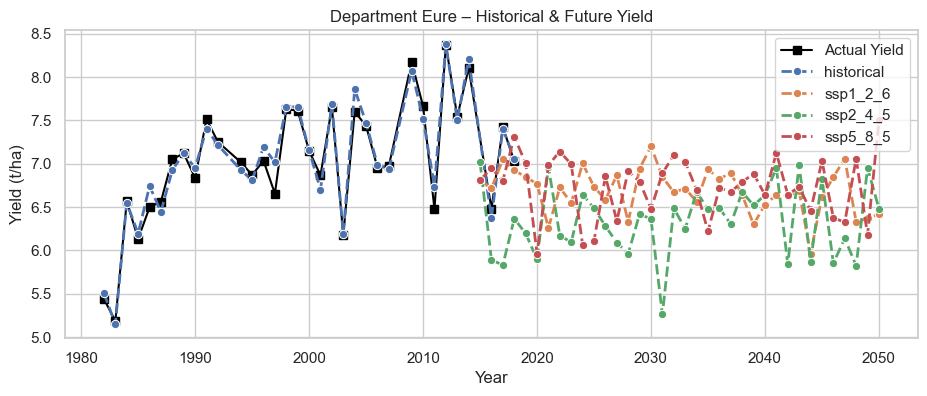

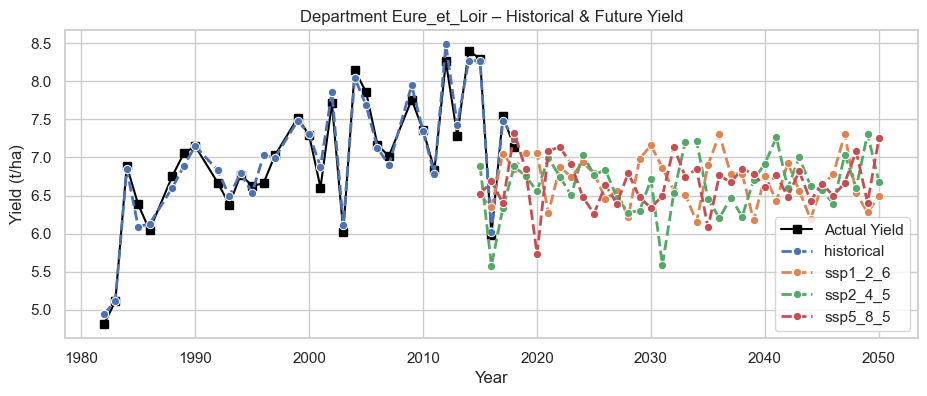

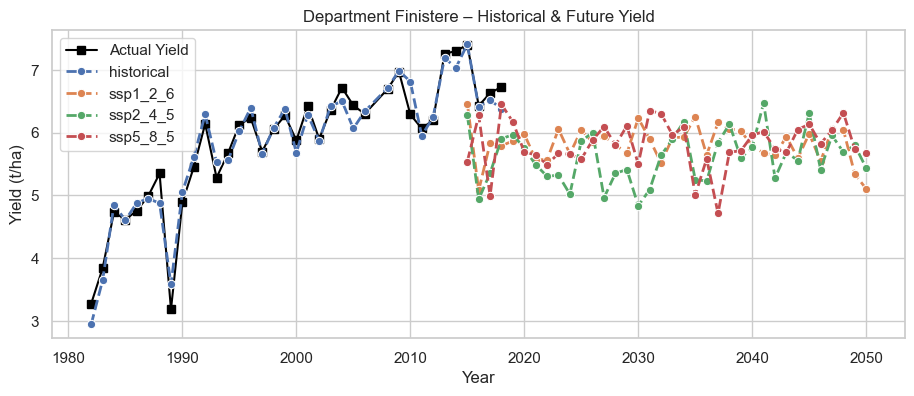

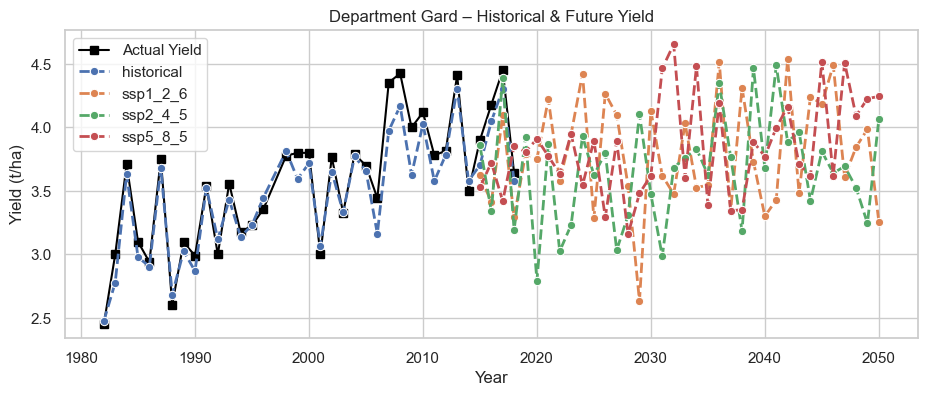

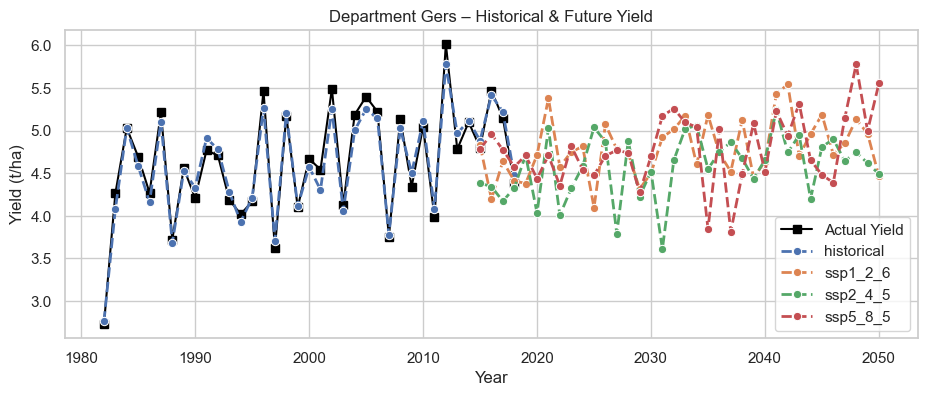

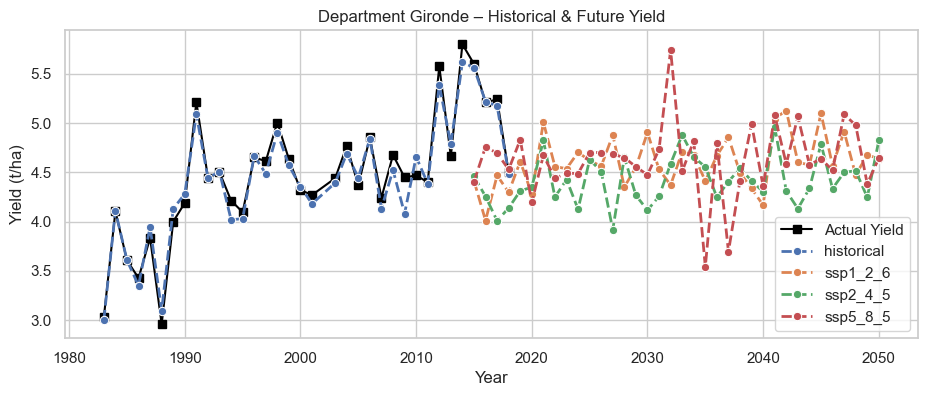

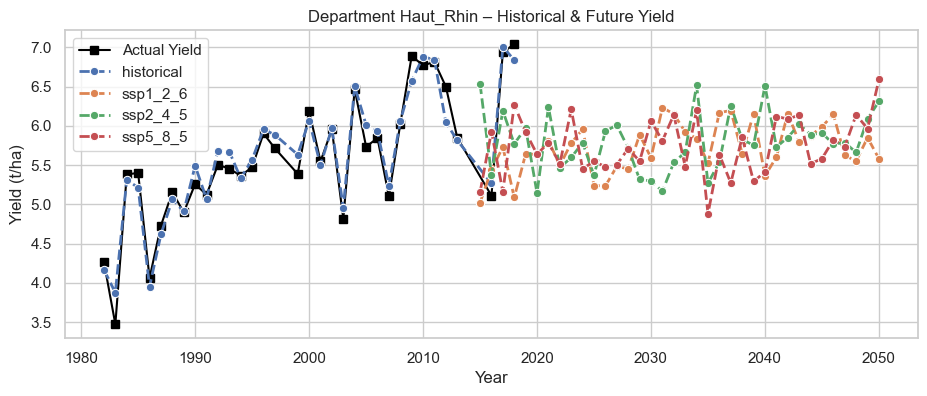

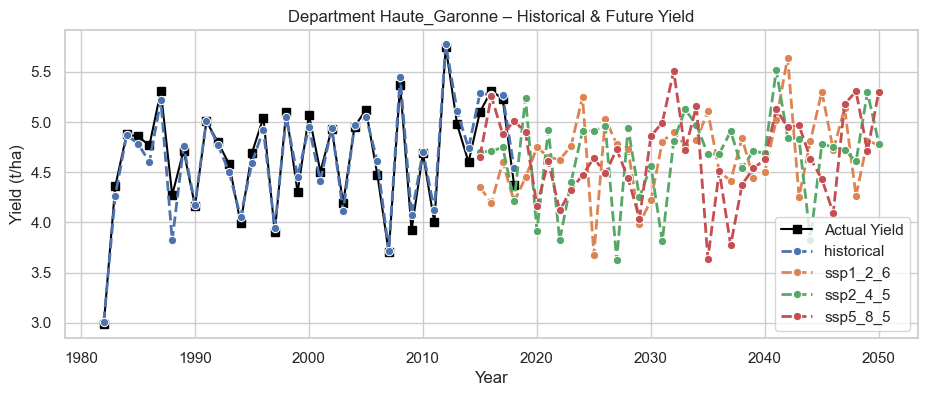

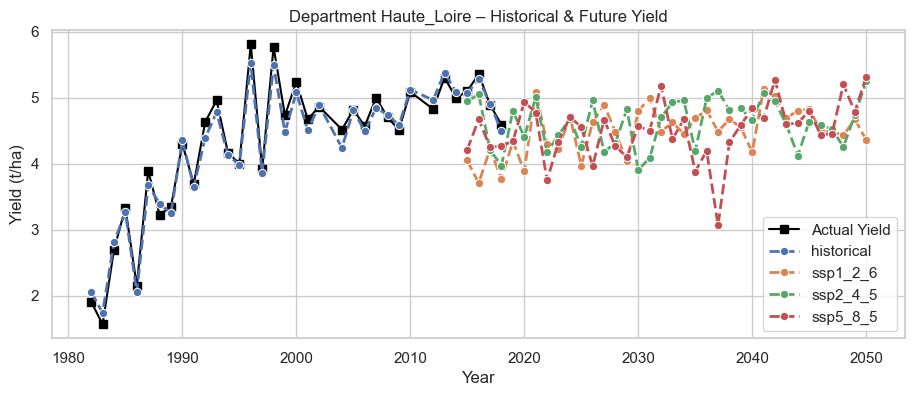

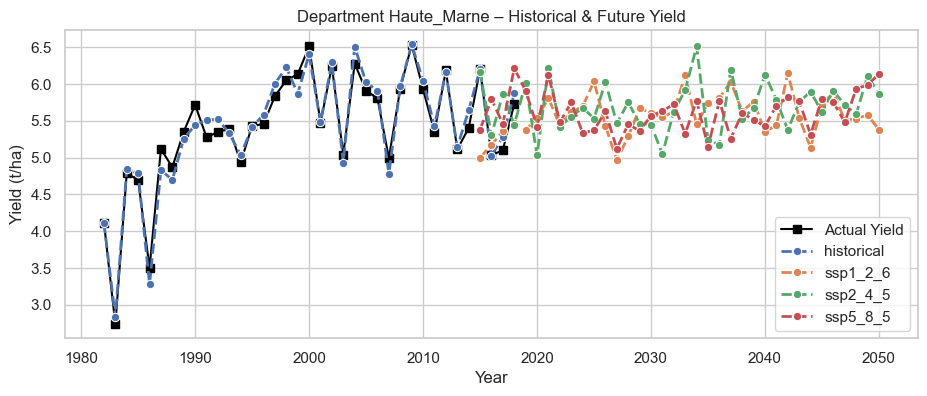

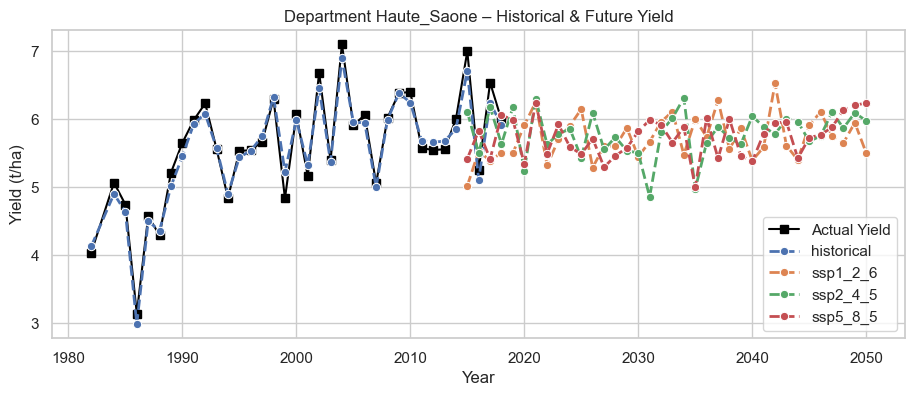

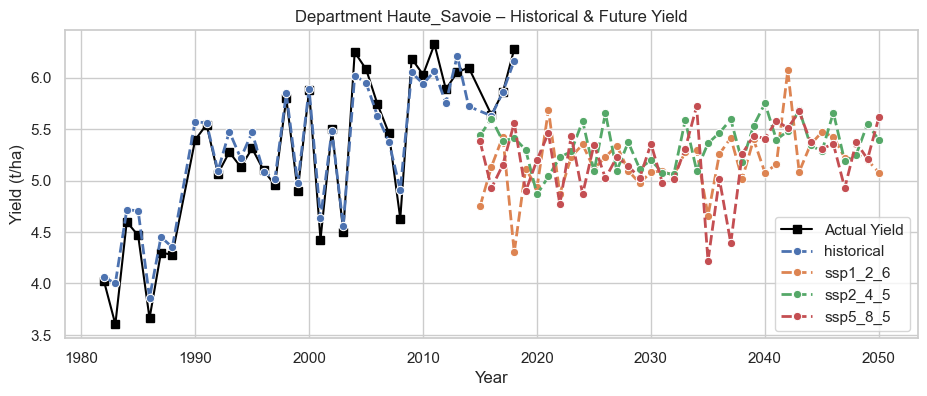

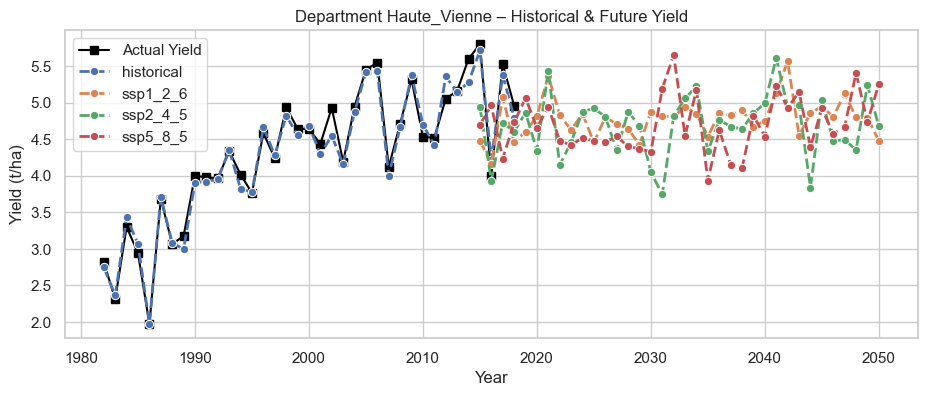

In [27]:
# ------------------------------
# Prepare Future Scenario Predictions
# ------------------------------

future_scenarios = ['ssp1_2_6','ssp2_4_5','ssp5_8_5']

# Store predictions
future_preds = []

for scenario in future_scenarios:
    # Subset climate data for this scenario
    climate_future = climate_wide[climate_wide['scenario'] == scenario].copy()
    
    # ------------------------------
    # Create Monthly & Seasonal Aggregates
    # ------------------------------
    climate_future['month'] = climate_future['time'].dt.month
    climate_future['day'] = climate_future['time'].dt.day
    climate_future['year'] = climate_future['time'].dt.year

    # Monthly
    monthly = climate_future.groupby(['nom_dep','year','month']).agg({
        'near_surface_air_temperature':['mean','std','max','min'],
        'daily_maximum_near_surface_air_temperature':'max',
        'precipitation':['sum','mean','max','min']
    }).reset_index()
    
    monthly.columns = ['department','year','month',
                       'temp_mean_m','temp_std_m','temp_max_m','temp_min_m',
                       'daily_max_temp_m','precip_sum_m','precip_mean_m','precip_max_m','precip_min_m']
    
    monthly_wide = monthly.pivot(index=['department','year'], columns='month')
    monthly_wide.columns = ['{}_m{}'.format(c[0], c[1]) for c in monthly_wide.columns]
    monthly_wide = monthly_wide.reset_index()
    
    # Multiply precipitation
    for col in monthly_wide.columns:
        if 'precip' in col:
            monthly_wide[col] = monthly_wide[col]*1000

    # Seasonal
    def month_to_season(month):
        if month in [12,1,2]: return 'Winter'
        elif month in [3,4,5]: return 'Spring'
        elif month in [6,7,8]: return 'Summer'
        else: return 'Autumn'
    
    climate_future['season'] = climate_future['month'].apply(month_to_season)
    
    seasonal = climate_future.groupby(['nom_dep','year','season']).agg({
        'near_surface_air_temperature':['mean','std','max','min'],
        'daily_maximum_near_surface_air_temperature':'max',
        'precipitation':['sum','mean','max','min']
    }).reset_index()
    
    seasonal.columns = ['department','year','season',
                        'temp_mean_s','temp_std_s','temp_max_s','temp_min_s',
                        'daily_max_temp_s','precip_sum_s','precip_mean_s','precip_max_s','precip_min_s']
    
    seasonal_wide = seasonal.pivot(index=['department','year'], columns='season')
    seasonal_wide.columns = ['{}_{}'.format(c[0], c[1]) for c in seasonal_wide.columns]
    seasonal_wide = seasonal_wide.reset_index()
    
    for col in seasonal_wide.columns:
        if 'precip' in col:
            seasonal_wide[col] = seasonal_wide[col]*1000

    # ------------------------------
    # Additional Climate Features
    # ------------------------------
    gdd_total = climate_future.groupby('nom_dep')['near_surface_air_temperature'].apply(lambda x: np.maximum(x-5,0).sum()).reset_index(name='gdd_total')
    heat_days = climate_future.groupby('nom_dep')['near_surface_air_temperature'].apply(lambda x: (x>30).sum()).reset_index(name='heat_days')
    dry_days = climate_future.groupby('nom_dep')['precipitation'].apply(lambda x: (x<1).sum()).reset_index(name='dry_days')

    spring = climate_future[climate_future['month'].isin([3,4,5])]
    spring_temp = spring.groupby('nom_dep')['near_surface_air_temperature'].mean().reset_index(name='spring_temp')
    spring_precip = spring.groupby('nom_dep')['precipitation'].sum().reset_index(name='spring_precip')
    temp_variability = climate_future.groupby('nom_dep')['near_surface_air_temperature'].std().reset_index(name='temp_variability')

    # ------------------------------
    # Merge Features
    # ------------------------------
    future_df = monthly_wide.merge(seasonal_wide, on=['department','year'], how='left')
    for df in [gdd_total, heat_days, dry_days, spring_temp, spring_precip, temp_variability]:
        future_df = future_df.merge(df, left_on='department', right_on='nom_dep', how='left')
        future_df.drop(columns=['nom_dep'], inplace=True)
    
    # Representative month
    rep_month = climate_future.groupby('nom_dep')['month'].mean().reset_index()
    rep_month.rename(columns={'nom_dep':'department','month':'month_rep'}, inplace=True)
    future_df = future_df.merge(rep_month, on='department', how='left')
    
    # Optional interaction
    if 'temp_mean_m1' in future_df.columns and 'precip_sum_m1' in future_df.columns:
        future_df['temp_precip_ratio'] = future_df['temp_mean_m1'] / (future_df['precip_sum_m1']+0.01)
    
    # Ensure department is categorical
    future_df['department'] = future_df['department'].astype('category')
    
    # Select top features
    X_future = future_df[X_top.columns].copy()
    
    # Predict
    if best_model_name == 'CatBoost':
        future_df['yield_pred'] = final_model.predict(X_future)
    else:
        X_future['department'] = X_future['department'].cat.codes
        future_df['yield_pred'] = final_model.predict(X_future)
    
    future_df['scenario'] = scenario
    future_preds.append(future_df[['department','year','yield_pred','scenario']])

# ------------------------------
# Combine Historical + Future
# ------------------------------
hist_preds = model_df[['department','year','yield_pred','yield']].copy()
hist_preds.rename(columns={'yield':'yield_actual'}, inplace=True)
hist_preds['scenario'] = 'historical'

all_preds = pd.concat([hist_preds] + future_preds, ignore_index=True)

# ------------------------------
# Plot Predictions + Actual Yield
# ------------------------------
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')

departments = all_preds['department'].unique()[:40]

for dept in departments:
    dept_data = all_preds[all_preds['department'] == dept]

    plt.figure(figsize=(11,4))
    
    # Actual (historical only)
    hist_actual = dept_data[dept_data['scenario'] == 'historical']
    plt.plot(
        hist_actual['year'],
        hist_actual['yield_actual'],
        color='black',
        #linestyle='--',
        marker='s',
        label='Actual Yield'
    )

    # Predicted
    sns.lineplot(
        data=dept_data,
        x='year',
        y='yield_pred',
        hue='scenario',
        linestyle='--',
        marker='o',
        linewidth=2
    )


    plt.title(f"Department {dept} – Historical & Future Yield")
    plt.ylabel("Yield (t/ha)")
    plt.xlabel("Year")
    plt.legend()
    plt.show()


# Actionable Recommendation

In [28]:
from sklearn.preprocessing import MinMaxScaler

# Select latest year to get department-level climate risk
latest_year = model_df['year'].max()
dept_climate = model_df[model_df['year']==latest_year][
    ['department', 'dry_days', 'heat_days', 'temp_variability']
].copy()

# Normalize metrics
scaler = MinMaxScaler()
dept_climate[['dry_norm','heat_norm','tempvar_norm']] = scaler.fit_transform(
    dept_climate[['dry_days','heat_days','temp_variability']]
)

# Invert so that lower risk = higher score
dept_climate['dry_score'] = 1 - dept_climate['dry_norm']
dept_climate['heat_score'] = 1 - dept_climate['heat_norm']
dept_climate['tempvar_score'] = 1 - dept_climate['tempvar_norm']

# Combine into ESG score (weighted)
dept_climate['esg_score'] = (0.4*dept_climate['dry_score'] + 
                             0.4*dept_climate['heat_score'] + 
                             0.2*dept_climate['tempvar_score'])

# Keep only department and esg_score
esg_scores = dept_climate[['department','esg_score']].copy()
esg_scores = esg_scores.sort_values('esg_score', ascending=False)

print(esg_scores)


                   department  esg_score
756             Cotes_d_Armor   0.719057
2714                   Savoie   0.715233
1077                Finistere   0.689500
288                    Ariege   0.679126
1509          Hautes_pyrenees   0.675181
540                    Cantal   0.661705
1008                     Eure   0.657995
1291              Haute_Loire   0.656641
1472             Hautes_Alpes   0.655208
504                  Calvados   0.655111
2083                   Manche   0.654533
2436                     Orne   0.650772
2011                   Lozere   0.637982
2781           Seine_Maritime   0.626130
2264                 Morbihan   0.611921
684                   Correze   0.602511
1580          Ille_et_Vilaine   0.600435
828               Deux_Sevres   0.600375
2464            Pas_de_Calais   0.596515
214                   Ardeche   0.590364
2499              Puy_de_Dome   0.587543
2370                     Nord   0.583922
2810                    Somme   0.579678
2155            

In [29]:
# ------------------------------
# 1️⃣ Aggregate Future Predictions by Department
# ------------------------------
# Use all_preds from your workflow
dept_stats = all_preds.groupby(['department','scenario'])['yield_pred'].agg(['mean','std']).reset_index()

# Compute overall mean yield and variability across scenarios
dept_overall = dept_stats.groupby('department').agg({
    'mean':'mean',      # average yield across scenarios
    'std':'mean'        # average variability across scenarios
}).reset_index().rename(columns={'mean':'future_mean_yield', 'std':'yield_variability'})

# ------------------------------
# 2️⃣ Normalize metrics for composite score
# ------------------------------
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# Higher yield is better, lower variability is better
dept_overall['norm_yield'] = scaler.fit_transform(dept_overall[['future_mean_yield']])
dept_overall['norm_variability'] = 1 - scaler.fit_transform(dept_overall[['yield_variability']])  # invert so low variability = high score

# ------------------------------
# 3️⃣ Merge ESG Scores (optional)
# ------------------------------
# If you have ESG scores DataFrame with columns: department, esg_score (0-1)
try:
    dept_overall = dept_overall.merge(esg_scores, on='department', how='left')
    dept_overall['esg_score'] = dept_overall['esg_score'].fillna(0.5)  # default if missing
except NameError:
    dept_overall['esg_score'] = 0.5  # placeholder if ESG data unavailable

# ------------------------------
# 4️⃣ Compute Composite Score
# ------------------------------
# Weighting: yield 50%, ESG 40%, variability 10%
dept_overall['composite_score'] = (0.4*dept_overall['norm_yield'] +
                                   0.4*dept_overall['esg_score'] +
                                   0.2*dept_overall['norm_variability'])

# ------------------------------
# 5️⃣ Rank Departments
# ------------------------------
dept_overall = dept_overall.sort_values('composite_score', ascending=False)

# ------------------------------
# 6️⃣ Generate Recommendations
# ------------------------------
def recommendation(score):
    if score >= 0.65:
        return 'Grow'
    elif score >= 0.45:
        return 'Limited / Diversify'
    else:
        return 'Avoid'

dept_overall['recommendation'] = dept_overall['composite_score'].apply(recommendation)

# ------------------------------
# 7️⃣ Display Decision Matrix
# ------------------------------
decision_cols = ['department', 'future_mean_yield', 'yield_variability', 'esg_score', 'composite_score', 'recommendation']
decision_matrix = dept_overall[decision_cols].reset_index(drop=True)
print(decision_matrix)


                 department  future_mean_yield  yield_variability  esg_score  \
0             Pas_de_Calais           6.993607           0.383221   0.596515   
1            Seine_Maritime           6.900262           0.403422   0.626130   
2                     Somme           6.920850           0.389588   0.579678   
3                      Oise           6.906411           0.385705   0.552111   
4                      Eure           6.703251           0.432281   0.657995   
5                      Nord           6.839434           0.419138   0.583922   
6                     Aisne           6.721714           0.386326   0.511225   
7                     Marne           6.754069           0.394013   0.502307   
8                    Savoie           5.216979           0.306154   0.715233   
9                  Ardennes           6.534808           0.381574   0.517780   
10             Eure_et_Loir           6.751127           0.465619   0.562191   
11                 Calvados           6.

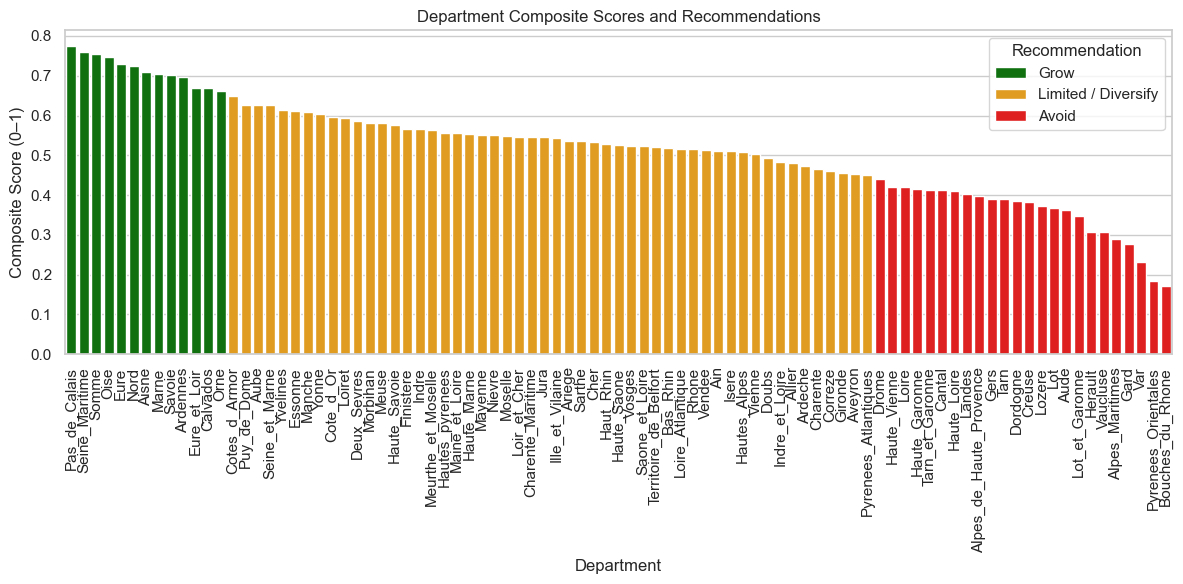

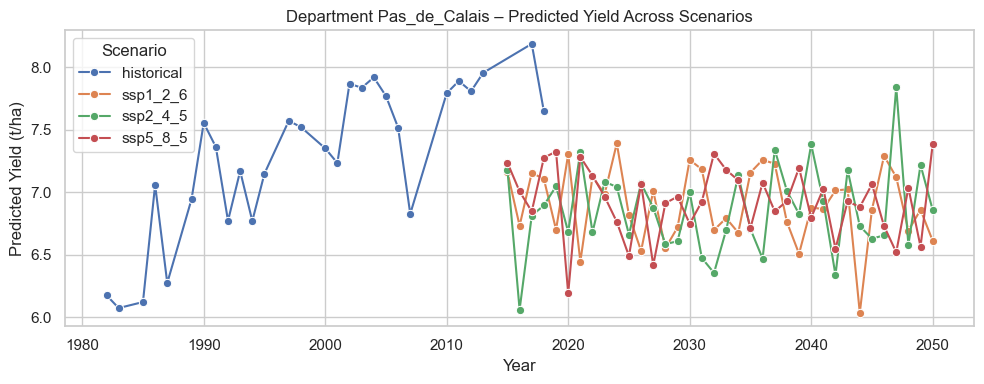

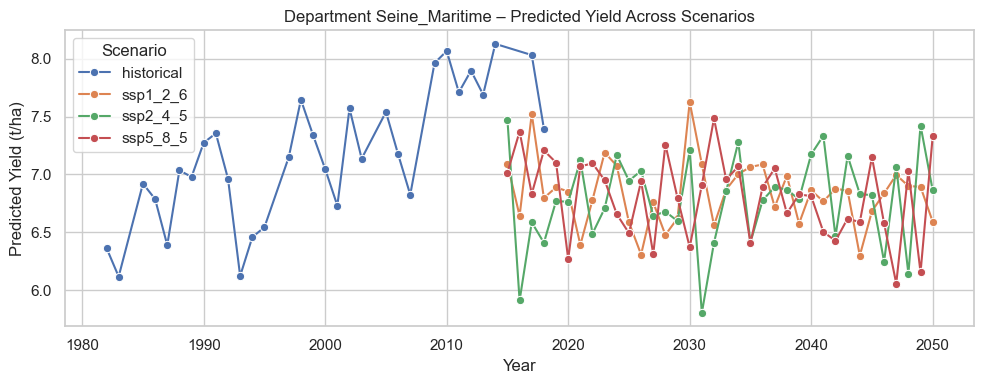

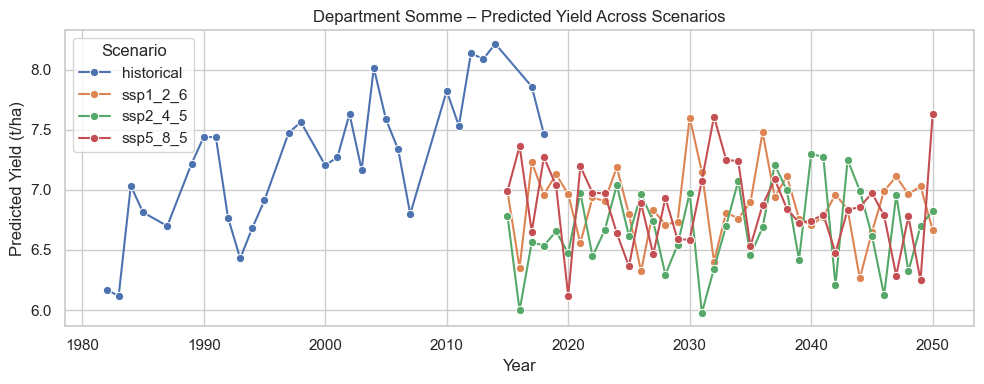

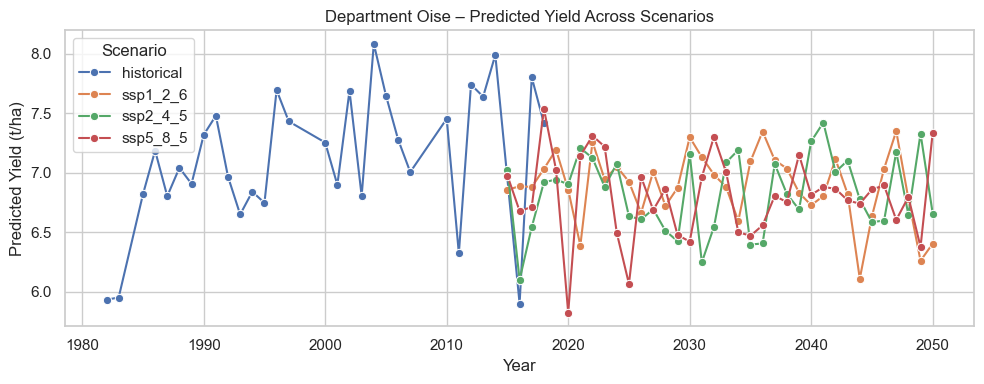

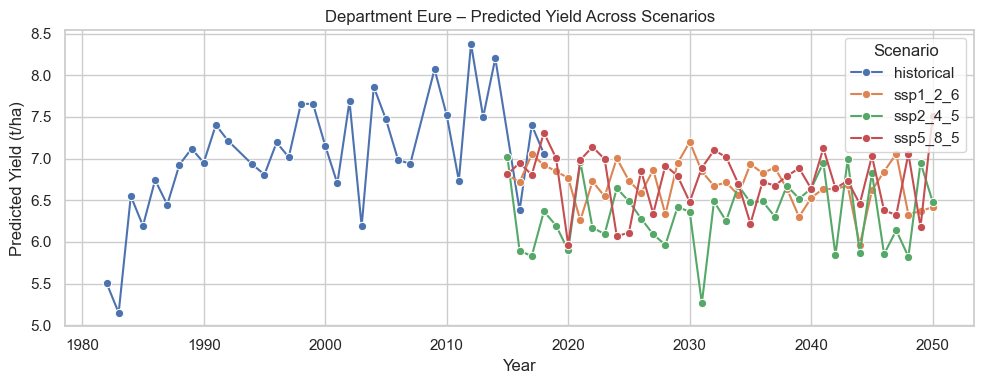

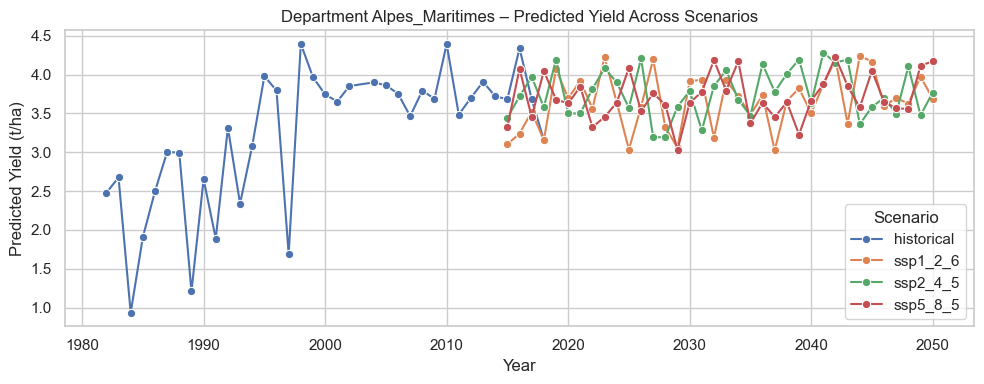

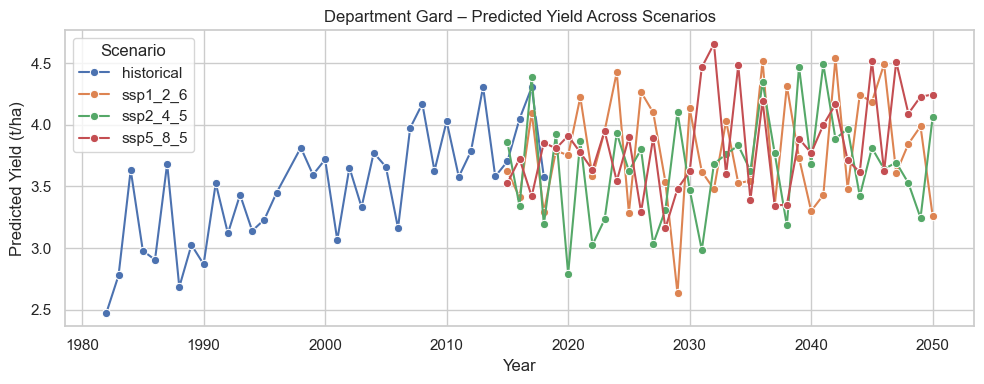

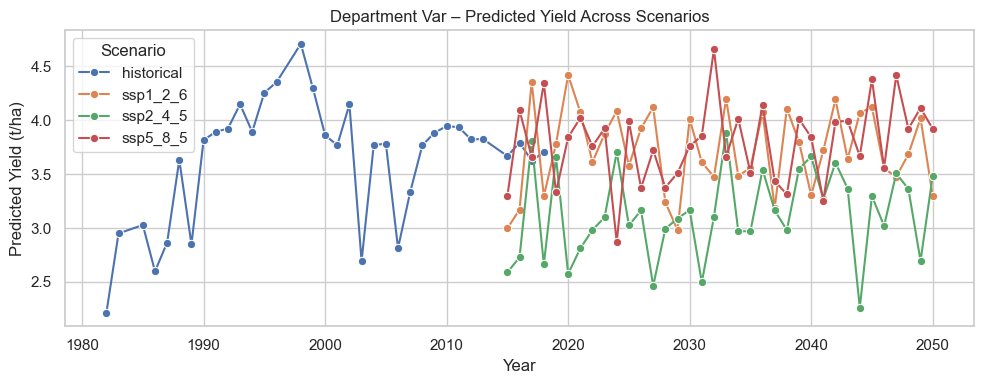

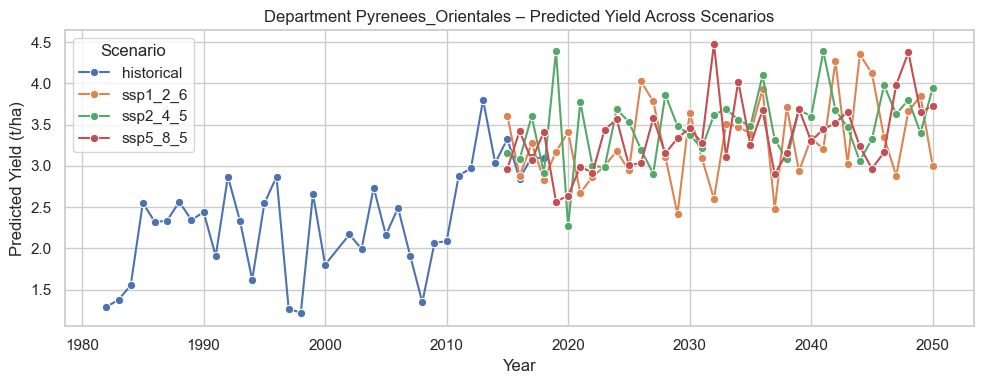

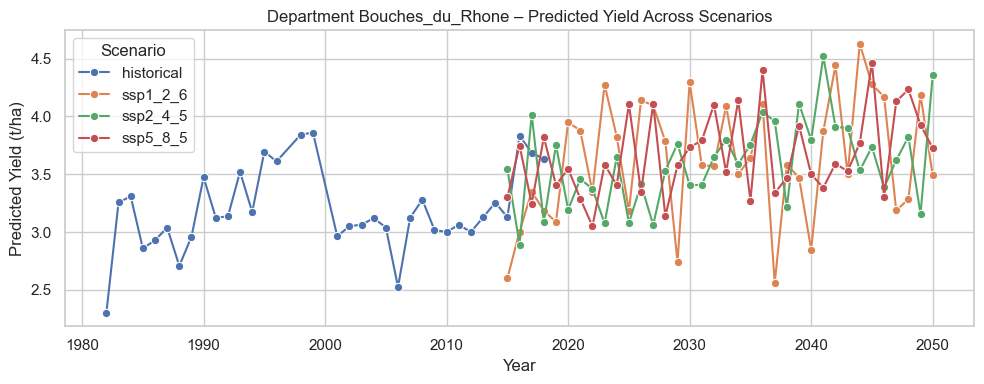

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid')

# ------------------------------
# 1️⃣ Bar Chart of Composite Scores
# ------------------------------
plt.figure(figsize=(12,6))
palette = {'Grow':'green','Limited / Diversify':'orange','Avoid':'red'}

sns.barplot(
    data=decision_matrix.sort_values('composite_score', ascending=False),
    x='department',
    y='composite_score',
    hue='recommendation',
    dodge=False,
    palette=palette
)
plt.xticks(rotation=90)
plt.title("Department Composite Scores and Recommendations")
plt.ylabel("Composite Score (0–1)")
plt.xlabel("Department")
plt.legend(title='Recommendation')
plt.tight_layout()
plt.show()

# ------------------------------
# 2️⃣ Line Plot of Predicted Yields Across Scenarios
# ------------------------------
# Select top 5 and bottom 5 departments for clarity
top_bottom_depts = list(decision_matrix.head(5)['department']) + list(decision_matrix.tail(5)['department'])

for dept in top_bottom_depts:
    dept_data = all_preds[all_preds['department']==dept]
    plt.figure(figsize=(10,4))
    sns.lineplot(data=dept_data, x='year', y='yield_pred', hue='scenario', marker='o')
    plt.title(f"Department {dept} – Predicted Yield Across Scenarios")
    plt.ylabel("Predicted Yield (t/ha)")
    plt.xlabel("Year")
    plt.legend(title='Scenario')
    plt.tight_layout()
    plt.show()


In [20]:
# ------------------------------
# 3️⃣ Average Yield and Variability for Top 5 Departments
# ------------------------------
top5_depts = list(decision_matrix.head(5)['department'])

top5_data = all_preds[all_preds['department'].isin(top5_depts)]

summary_stats = (
    top5_data
    .groupby('department')['yield_pred']
    .agg(
        avg_yield='mean',
        variability='std'
    )
    .reset_index()
    .sort_values('avg_yield', ascending=False)
)

print("\nAverage Yield and Variability for Top 5 Departments:")
print(summary_stats)



Average Yield and Variability for Top 5 Departments:
       department  avg_yield  variability
2   Pas_de_Calais   6.976250     0.417503
4           Somme   6.902923     0.439575
1            Oise   6.898821     0.408192
3  Seine_Maritime   6.890482     0.433300
0            Eure   6.698375     0.517158


In [31]:
# ------------------------------
# Function: Average Yield and Variability for Selected Departments
# ------------------------------
def summarize_departments(departments, all_preds):
    selected_data = all_preds[all_preds['department'].isin(departments)]

    summary_stats = (
        selected_data
        .groupby('department')['yield_pred']
        .agg(
            avg_yield='mean',
            variability='std'
        )
        .reset_index()
        .sort_values('avg_yield', ascending=False)
    )

    return summary_stats


# Example usage
dept_list = ['Somme']  # replace with your departments
summary = summarize_departments(dept_list, all_preds)

print("\nAverage Yield and Variability:")
print(summary)



Average Yield and Variability:
  department  avg_yield  variability
0      Somme   6.902923     0.439575


GeoJSON columns: Index(['code', 'nom', 'region', 'geometry'], dtype='str')
Ain
Aisne
Allier
Alpes-Maritimes
Alpes-de-Haute-Provence
Ardennes
Ardèche
Ariège
Aube
Aude
Aveyron
Bas-Rhin
Bouches-du-Rhône
Calvados
Cantal
Charente
Charente-Maritime
Cher
Corrèze
Corse-du-Sud
Creuse
Côte-d'Or
Côtes-d'Armor
Deux-Sèvres
Dordogne
Doubs
Drôme
Essonne
Eure
Eure-et-Loir
Finistère
Gard
Gers
Gironde
Guadeloupe
Guyane
Haut-Rhin
Haute-Corse
Haute-Garonne
Haute-Loire
Haute-Marne
Haute-Savoie
Haute-Saône
Haute-Vienne
Hautes-Alpes
Hautes-Pyrénées
Hauts-de-Seine
Hérault
Ille-et-Vilaine
Indre
Indre-et-Loire
Isère
Jura
La Réunion
Landes
Loir-et-Cher
Loire
Loire-Atlantique
Loiret
Lot
Lot-et-Garonne
Lozère
Maine-et-Loire
Manche
Marne
Martinique
Mayenne
Mayotte
Meurthe-et-Moselle
Meuse
Morbihan
Moselle
Nièvre
Nord
Nouvelle-Calédonie
Oise
Orne
Paris
Pas-de-Calais
Polynésie française
Puy-de-Dôme
Pyrénées-Atlantiques
Pyrénées-Orientales
Rhône
Saint-Barthélemy
Saint-Martin
Saint-Pierre-et-Miquelon
Sarthe
Savoie
Saôn

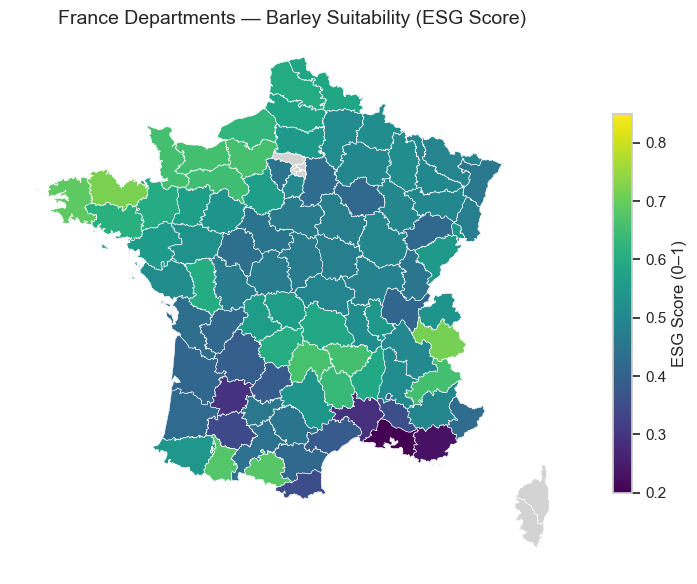

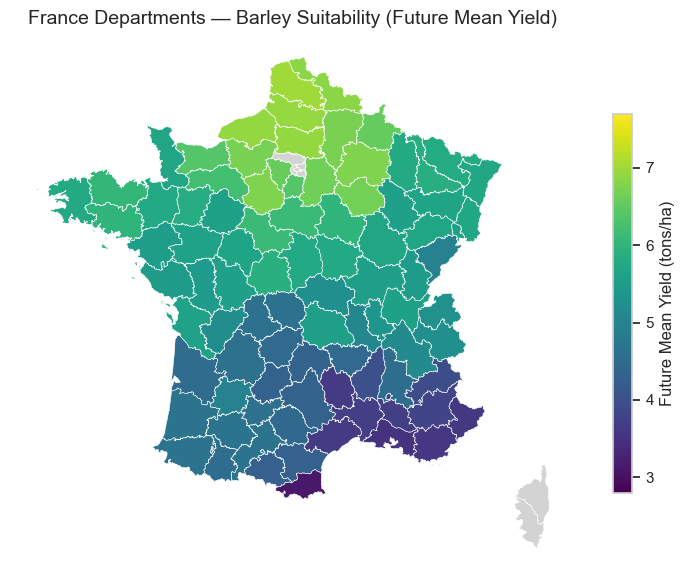

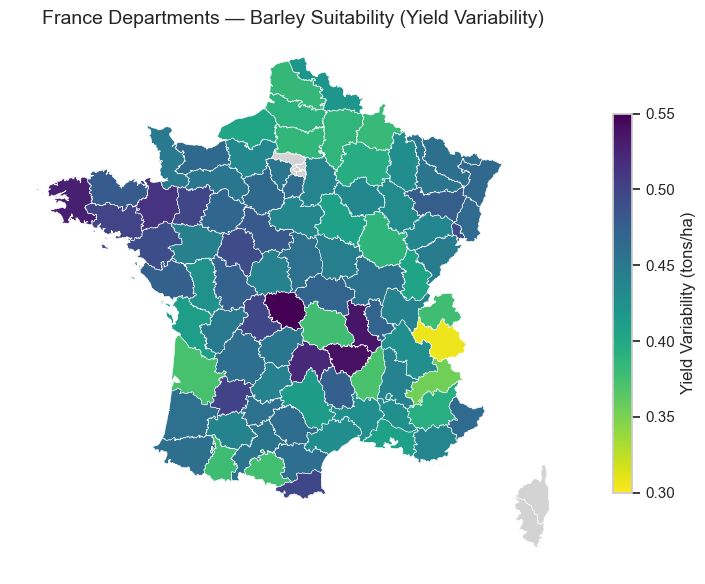

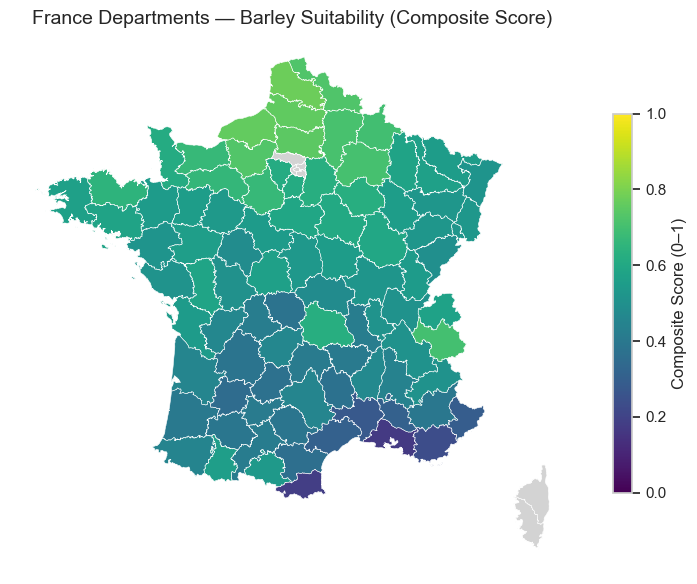

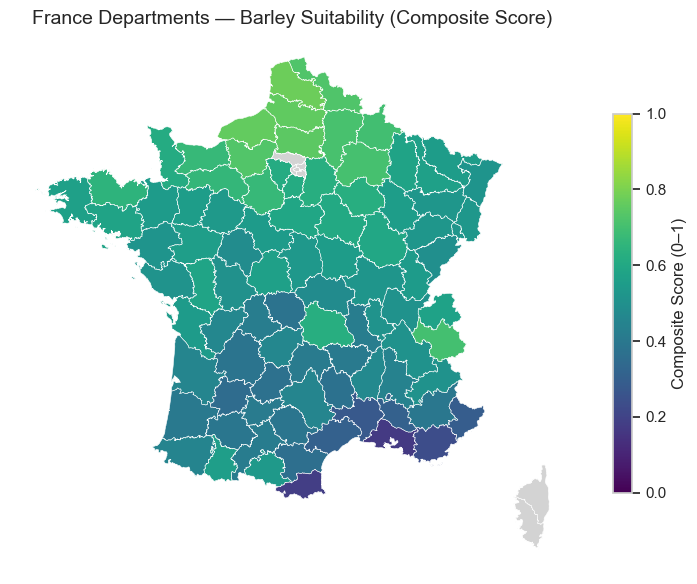

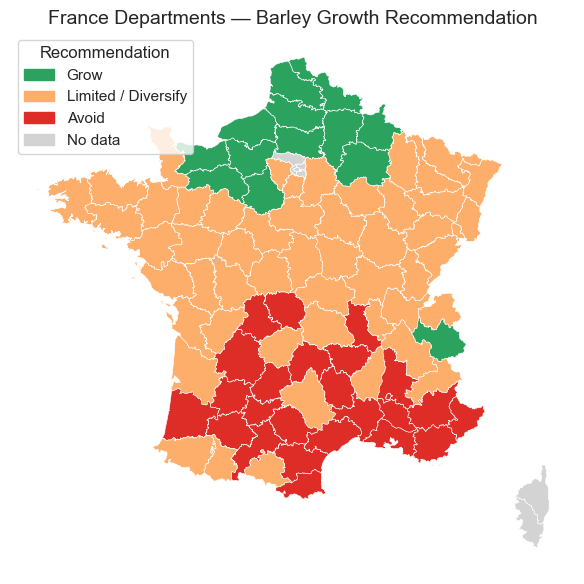

In [33]:
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import unicodedata
from rapidfuzz import process, fuzz

# =========================================================
# 1️⃣ Utility: normalize department names
# =========================================================

def normalize_name(s):
    if s is None:
        return None
    s = unicodedata.normalize("NFKD", s)
    s = "".join(c for c in s if not unicodedata.combining(c))
    s = s.lower().strip()
    s = s.replace("-", " ")
    s = s.replace("'", " ")
    s = s.replace("_", " ")   # 🔥 THIS IS THE MISSING PIECE
    s = " ".join(s.split())
    return s


# =========================================================
# 2️⃣ Load GeoJSON
# =========================================================
fr_depts = gpd.read_file("data/departements-100m.geojson")

print("GeoJSON columns:", fr_depts.columns)

geo_departments = sorted(fr_depts['nom'].unique())
matrix_departments = sorted(decision_matrix['department'].unique())
# Print them
for dept in geo_departments:
    print(dept)
for dep in matrix_departments:
    print(dep)

# Normalize names
fr_depts['nom_norm'] = fr_depts['nom'].apply(normalize_name)
# Keep only mainland + Corsica (metropolitan France)
fr_depts = fr_depts[fr_depts['code'].str.len() <= 2]


decision_matrix['nom_norm'] = decision_matrix['department'].apply(normalize_name)

# =========================================================
# 3️⃣ Initial merge (exact normalized match)
# =========================================================
map_df = fr_depts.merge(
    decision_matrix,
    on="nom_norm",
    how="left"
)

# =========================================================
# 4️⃣ Detect missing departments
# =========================================================
missing = map_df[map_df['composite_score'].isna()]
print(f"\nMissing after exact match: {len(missing)}")

if not missing.empty:
    print(missing[['nom']])

# =========================================================
# 5️⃣ Fuzzy matching for remaining mismatches
# =========================================================
geo_names = fr_depts['nom_norm'].unique()
decision_names = decision_matrix['nom_norm'].unique()

unmatched_geo = set(geo_names) - set(decision_names)

fuzzy_map = {}

for name in unmatched_geo:
    match, score, _ = process.extractOne(
        name,
        decision_names,
        scorer=fuzz.token_sort_ratio
    )
    if score >= 80:  # safe threshold
        fuzzy_map[name] = match
        print(f"FUZZY MATCH: {name}  -->  {match}  (score={score})")

# Apply fuzzy corrections
decision_matrix['nom_norm'] = decision_matrix['nom_norm'].replace(
    {v: k for k, v in fuzzy_map.items()}
)

# =========================================================
# 6️⃣ Final merge (after fuzzy correction)
# =========================================================
map_df = fr_depts.merge(
    decision_matrix,
    on="nom_norm",
    how="left"
)

# Final diagnostic
still_missing = map_df[map_df['composite_score'].isna()]
print(f"\nMissing after fuzzy matching: {len(still_missing)}")
if not still_missing.empty:
    print(still_missing[['nom']])


# =========================================================
# 7️⃣ Plot ESG Score Map
# =========================================================
fig, ax = plt.subplots(1, 1, figsize=(8, 6))

map_df.plot(
    column='esg_score',
    cmap='viridis',
    linewidth=0.4,
    edgecolor='white',
    legend=True,
    legend_kwds={'label': "ESG Score (0–1)", 'shrink': 0.7},
    vmin=0.2,
    vmax=0.85,
    missing_kwds={
        "color": "lightgray",
        "label": "No data"
    },
    ax=ax
)

ax.set_title("France Departments — Barley Suitability (ESG Score)", fontsize=14)
ax.axis('off')
plt.tight_layout()
plt.show()


# =========================================================
# 7️⃣ Plot Yield Map
# =========================================================
fig, ax = plt.subplots(1, 1, figsize=(8, 6))

map_df.plot(
    column='future_mean_yield',
    cmap='viridis',
    linewidth=0.4,
    edgecolor='white',
    legend=True,
    legend_kwds={'label': "Future Mean Yield (tons/ha)", 'shrink': 0.7},
    vmin=2.8,
    vmax=7.7,
    missing_kwds={
        "color": "lightgray",
        "label": "No data"
    },
    ax=ax
)

ax.set_title("France Departments — Barley Suitability (Future Mean Yield)", fontsize=14)
ax.axis('off')
plt.tight_layout()
plt.show()

# =========================================================
# 7️⃣ Plot Variability Map
# =========================================================
fig, ax = plt.subplots(1, 1, figsize=(8, 6))

map_df.plot(
    column='yield_variability',
    cmap='viridis_r',
    linewidth=0.4,
    edgecolor='white',
    legend=True,
    legend_kwds={'label': "Yield Variability (tons/ha)", 'shrink': 0.7},
    vmin=0.3,
    vmax=0.55,
    missing_kwds={
        "color": "lightgray",
        "label": "No data"
    },
    ax=ax
)

ax.set_title("France Departments — Barley Suitability (Yield Variability)", fontsize=14)
ax.axis('off')
plt.tight_layout()
plt.show()

# =========================================================
# 7️⃣ Plot Composite Score Map
# =========================================================
fig, ax = plt.subplots(1, 1, figsize=(8, 6))

map_df.plot(
    column='composite_score',
    cmap='viridis',
    linewidth=0.4,
    edgecolor='white',
    legend=True,
    legend_kwds={'label': "Composite Score (0–1)", 'shrink': 0.7},
    vmin=0,
    vmax=1,
    missing_kwds={
        "color": "lightgray",
        "label": "No data"
    },
    ax=ax
)

ax.set_title("France Departments — Barley Suitability (Composite Score)", fontsize=14)
ax.axis('off')
plt.tight_layout()
plt.show()

# =========================================================
# 7️⃣ Plot Composite Score Map
# =========================================================
fig, ax = plt.subplots(1, 1, figsize=(8, 6))

map_df.plot(
    column='composite_score',
    cmap='viridis',
    linewidth=0.4,
    edgecolor='white',
    legend=True,
    legend_kwds={'label': "Composite Score (0–1)", 'shrink': 0.7},
    vmin=0,
    vmax=1,
    missing_kwds={
        "color": "lightgray",
        "label": "No data"
    },
    ax=ax
)

ax.set_title("France Departments — Barley Suitability (Composite Score)", fontsize=14)
ax.axis('off')
plt.tight_layout()
plt.show()

# =========================================================
# 8️⃣ Plot Recommendation Categories
# =========================================================
color_dict = {
    'Grow': '#2ca25f',
    'Limited / Diversify': '#fdae6b',
    'Avoid': '#de2d26'
}

map_df['color'] = map_df['recommendation'].map(color_dict).fillna('lightgray')

fig, ax = plt.subplots(1, 1, figsize=(8, 6))

map_df.plot(
    color=map_df['color'],
    linewidth=0.4,
    edgecolor='white',
    ax=ax
)

ax.set_title("France Departments — Barley Growth Recommendation", fontsize=14)
ax.axis('off')

legend_patches = [
    mpatches.Patch(color=v, label=k)
    for k, v in color_dict.items()
]
legend_patches.append(mpatches.Patch(color='lightgray', label='No data'))

ax.legend(handles=legend_patches, title="Recommendation", loc="upper left")
plt.tight_layout()
plt.show()


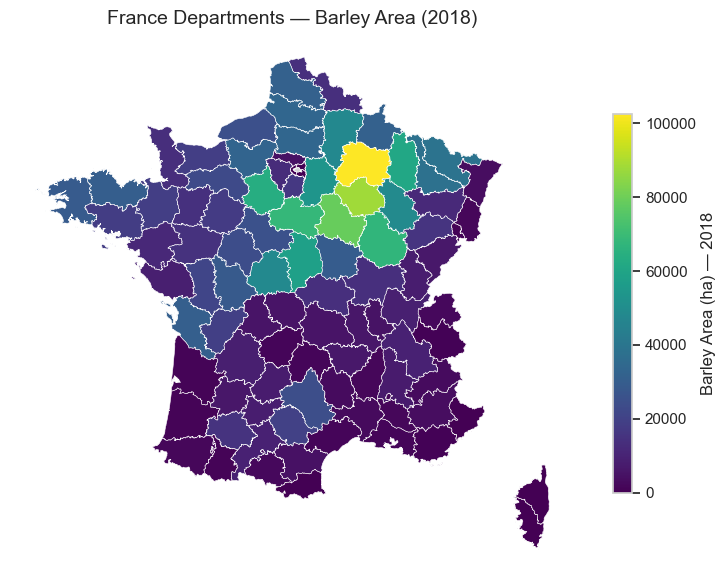

In [34]:
# =========================================================
# Area in 2018 map
# =========================================================

# Prepare area data
area_2018 = (
    yield_df[yield_df['year'] == 2018]
    .groupby('department', as_index=False)['area']
    .mean()
)

# Normalize names
area_2018['nom_norm'] = area_2018['department'].apply(normalize_name)

# Merge with geo data
area_map_df = fr_depts.merge(
    area_2018,
    on="nom_norm",
    how="left"
)

# Plot
fig, ax = plt.subplots(1, 1, figsize=(8, 6))

area_map_df.plot(
    column='area',
    cmap='viridis',
    linewidth=0.4,
    edgecolor='white',
    legend=True,
    legend_kwds={'label': "Barley Area (ha) — 2018", 'shrink': 0.7},
    missing_kwds={
        "color": "lightgray",
        "label": "No data"
    },
    ax=ax
)

ax.set_title("France Departments — Barley Area (2018)", fontsize=14)
ax.axis('off')
plt.tight_layout()
'''# Add area labels on the map
for idx, row in area_map_df.iterrows():
    if row['geometry'] is not None and row['area'] == row['area']:  # skip NaN
        centroid = row['geometry'].centroid
        ax.text(
            centroid.x,
            centroid.y,
            f"{int(row['area'])}",
            fontsize=8,
            ha='center',
            color='white'
        )'''

plt.show()
